In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [241]:
#Loading in the rapsodo data and outcomes from the lives
data = pd.read_csv('SC2024_Pitching_Data.csv')
pbpstat = pd.read_csv('SCPitch_Outcomes.csv')

In [242]:
# Define font properties for general text
font_properties = {'family': 'DejaVu Sans', 'size': 12}

# Define font properties for titles
font_properties_titles = {'family': 'DejaVu Sans', 'size': 20}

# Define font properties for axes labels
font_properties_axes = {'family': 'DejaVu Sans', 'size': 16}

# Set the theme for seaborn plots
sns.set_theme(style='whitegrid', 
              palette='deep', 
              font='DejaVu Sans', 
              font_scale=1.5, 
              color_codes=True, 
              rc=None)
# Import matplotlib
import matplotlib as mpl

# Set the resolution of the figures to 300 DPI
mpl.rcParams['figure.dpi'] = 300

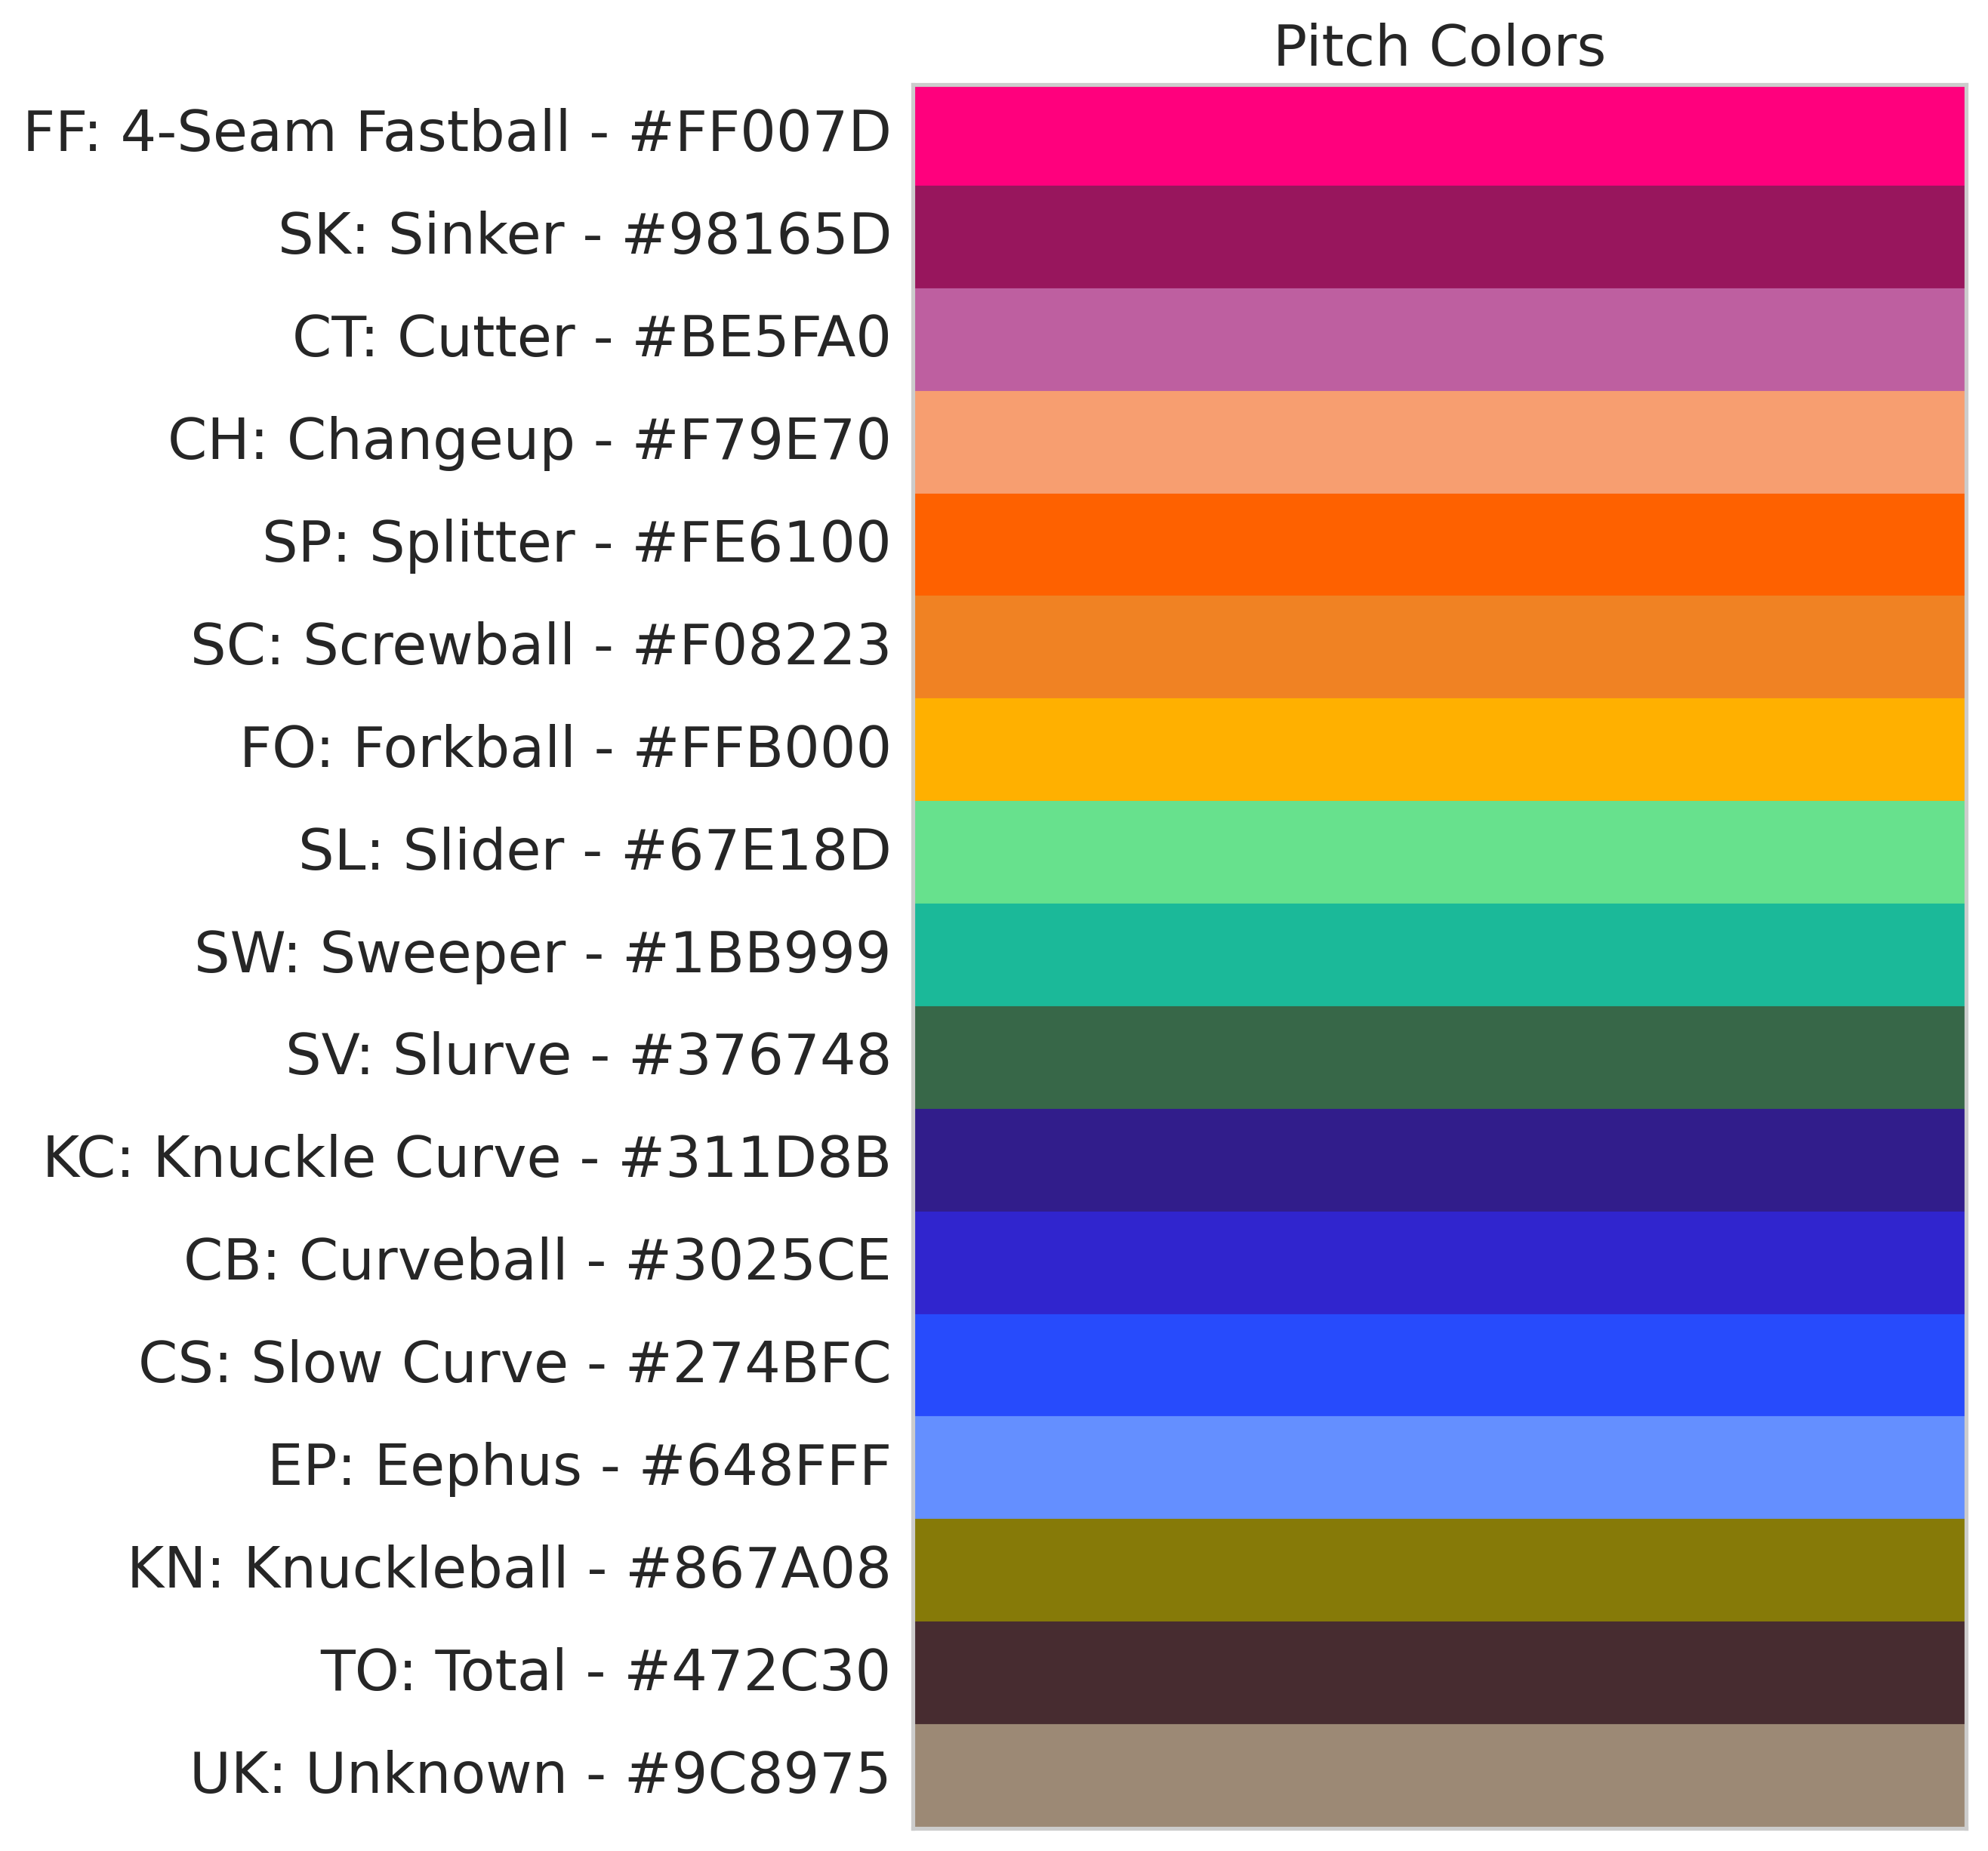

In [243]:
pitch_colours = {
    ## Fastballs ##
    'FF': {'colour': '#FF007D', 'name': '4-Seam Fastball'},
    'SK': {'colour': '#98165D', 'name': 'Sinker'},
    'CT': {'colour': '#BE5FA0', 'name': 'Cutter'},

    ## Offspeed ##
    'CH': {'colour': '#F79E70', 'name': 'Changeup'},
    'SP': {'colour': '#FE6100', 'name': 'Splitter'},
    'SC': {'colour': '#F08223', 'name': 'Screwball'},
    'FO': {'colour': '#FFB000', 'name': 'Forkball'},

    ## Sliders ##
    'SL': {'colour': '#67E18D', 'name': 'Slider'},
    'SW': {'colour': '#1BB999', 'name': 'Sweeper'},
    'SV': {'colour': '#376748', 'name': 'Slurve'},

    ## Curveballs ##
    'KC': {'colour': '#311D8B', 'name': 'Knuckle Curve'},
    'CB': {'colour': '#3025CE', 'name': 'Curveball'},
    'CS': {'colour': '#274BFC', 'name': 'Slow Curve'},
    'EP': {'colour': '#648FFF', 'name': 'Eephus'},

    ## Others ##
    'KN': {'colour': '#867A08', 'name': 'Knuckleball'},
    'TO': {'colour': '#472C30', 'name': 'Total'},
    'UK': {'colour': '#9C8975', 'name': 'Unknown'},
}

# Create a dictionary mapping pitch types to their colors
dict_colour = dict(zip(pitch_colours.keys(), [pitch_colours[key]['colour'] for key in pitch_colours]))

# Create a dictionary mapping pitch types to their colors
dict_pitch = dict(zip(pitch_colours.keys(), [pitch_colours[key]['name'] for key in pitch_colours]))

import matplotlib.pyplot as plt
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 10))

# Plot a square for each pitch type with its corresponding color
for i, pitch_type in enumerate(pitch_colours):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=pitch_colours[pitch_type]['colour']))
    ax.text(-0.02, i + 0.5, f'{pitch_type}: {pitch_colours[pitch_type]["name"]} - {pitch_colours[pitch_type]["colour"]}', va='center', ha='right')

# Set the y-axis limits and remove ticks
ax.set_ylim(0, len(pitch_colours))
ax.set_yticks([])
ax.set_ylabel('')

# Remove the x-axis
ax.set_xticks([])
ax.set_xlabel('')
ax.invert_yaxis()

# Set the title
ax.set_title('Pitch Colors')

plt.show()

In [244]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

#creating a dropdown menu to make choosing the desired pitcher easier
# Create a dictionary to map pitcher_name to player_id
name_to_id = dict(zip(data['pither_name'], data['player_id']))

# Set a default player_id to avoid None values
default_player_id = list(name_to_id.values())[0]

# Create dropdown widgets
dropdown_pitcher = widgets.Dropdown(
    options=data['pither_name'].unique(),
    value=None,  # Default to None to indicate no initial selection
    description='Pitcher:'
)

dates = pd.date_range(start='2024-09-01', end='2024-10-31').strftime('%Y-%m-%d')

dropdown_start_date = widgets.Dropdown(
    options=dates,
    value=None,  # Default to None to indicate no initial selection
    description='Start Date:'
)

dropdown_end_date = widgets.Dropdown(
    options=dates,
    value=None,  # Default to None to indicate no initial selection
    description='End Date:'
)

# Create an Output widget
output = widgets.Output()

# Define a function to update the output based on dropdown selections
def update_output(change):
    global global_player_id, global_start_date, global_end_date
    # Only update if all dropdowns have valid values
    if dropdown_pitcher.value and dropdown_start_date.value and dropdown_end_date.value:
        with output:
            # Clear previous output
            output.clear_output()
            
            selected_pitcher = dropdown_pitcher.value
            start_date = dropdown_start_date.value
            end_date = dropdown_end_date.value

            global_player_id = name_to_id.get(selected_pitcher, default_player_id)
            global_start_date = pd.to_datetime(start_date)
            global_end_date = pd.to_datetime(end_date)
            
            # Get the player_id from the selected pitcher
            player_id = name_to_id.get(selected_pitcher, default_player_id)
            
            # Print the selected player_id and date range
            print(f"Selected Player ID: {player_id}")
            print(f"Start Date: {start_date}")
            print(f"End Date: {end_date}")

# Link the function to the dropdowns
dropdown_pitcher.observe(update_output, names='value')
dropdown_start_date.observe(update_output, names='value')
dropdown_end_date.observe(update_output, names='value')

# Display the dropdowns and the output area
display(dropdown_pitcher, dropdown_start_date, dropdown_end_date, output)

def process_data_with_selected_player():
    if global_player_id is None or global_start_date is None or global_end_date is None:
        print("No player selected yet.")
        return



Dropdown(description='Pitcher:', options=('Adam Martin', nan, 'TJ Curley', 'Josh Florence', 'Hunter Bell', 'Gi…

Dropdown(description='Start Date:', options=('2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-…

Dropdown(description='End Date:', options=('2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05…

Output()

In [285]:
#This grabs the pitch data from the desired pitcher

player_id = global_player_id
df_id = data[data['player_id'] == player_id]
df_id['date'] = pd.to_datetime(df_id['date'])

#Team Averages Data
df_all=data

start_date = global_start_date
end_date = global_end_date

# Filter rows based on the date range
df_date = df_id[(df_id['date'] >= start_date) & (df_id['date'] <= end_date)]
df = df_date
#Player Name for Graphic
pname = df_id['pither_name'].unique()

#Display Desired Player
df.head()

C:\Users\chame\AppData\Local\Temp\ipykernel_37772\1336210051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['date'] = pd.to_datetime(df_id['date'])


pither_name  player_id p_throws   No       date      Pitch ID pitch_type  \
0  Adam Martin        9.0        R  1.0 2024-09-04  1.725470e+09         FF   
1  Adam Martin        9.0        R  2.0 2024-09-04  1.725470e+09         FF   
2  Adam Martin        9.0        R  3.0 2024-09-04  1.725470e+09         FF   
3  Adam Martin        9.0        R  4.0 2024-09-04  1.725470e+09         SK   
4  Adam Martin        9.0        R  5.0 2024-09-04  1.725470e+09         SL   

  Is Strike  Strike Zone Side  Strike Zone Height  ...  Release Angle  relY  \
0         Y             -5.08               28.61  ...          -0.01  4.40   
1         N             -3.69               15.97  ...          -1.04  4.29   
2         N            -16.36               32.44  ...          -0.27  4.42   
3         N             -2.75               15.96  ...          -0.67  4.18   
4         N            -12.74               10.44  ...           0.67  3.76   

   relX        ext Gyro Degree (deg)           Unique ID  \
0  1.36   2.071806             -6.86  1244507@1725469787   
1  1.46   2.146881             -8.63  1244507@1725469801   
2  1.45  1.9747696            -12.82  1244507@1725469816   
3  1.49  2.0550842             -7.25  1244507@1725469835   
4  1.86        NaN             73.23  1244507@1725469852   

   Device Serial Number  Unnamed: 30    IVB     HB  
0          RBB21ZC1H31R          NaN  14.00  13.04  
1          RBB21ZC1H31R          NaN  12.74  12.48  
2          RBB21ZC1H31R          NaN  15.62  12.76  
3          RBB21ZC1H31R          NaN  11.38  16.40  
4          RBB21ZC1H31R          NaN   1.28   2.04  

[5 rows x 33 columns]

In [286]:
#This grabs the lives outcome data from the desired pitcher

player_id = global_player_id
df_p = pbpstat[pbpstat['player_id'] == player_id]

#Team Averages Data
df_pav=pbpstat

dfp = df_p

# Filter rows based on the date range

#Display Desired Player
dfp.head()

pitcher_name  player_id pitch_type  pitches     ip  bf   era  whip  wtbip  \
10  Adam Martin          9         FF       61   4.00  21  4.50  2.00   2.00   
25  Adam Martin          9         CH       52   3.00  11  0.00  0.67   0.67   
57  Adam Martin          9         SL       15   1.33   5  0.00  0.75   0.75   
74  Adam Martin          9         TO      184  11.00  50  1.64  1.36   1.36   

     fip  ... ld_rate offb_rate iffb_rate  hh_rate  whiff_rate swing_rate  \
10  5.52  ...  21.40%    28.60%     7.10%   14.30%      20.00%     41.00%   
25  4.49  ...   0.00%    14.30%    14.30%   14.30%      47.60%     40.40%   
57  3.57  ...   0.00%     0.00%     0.00%    0.00%      60.00%     33.30%   
74  4.93  ...  10.00%    26.67%    10.00%   13.33%      33.33%     42.62%   

   strike_rate csw_rate freebase9   spot  
10      57.40%   24.60%      9.00  49.2%  
25      57.70%   36.50%      3.00  55.8%  
57      53.30%   40.00%      6.75  53.3%  
74      56.52%   27.72%     10.64  49.5%  

[4 rows x 26 columns]

In [287]:
from PIL import Image

def plot_logo(ax: plt.Axes):

    img = Image.open("stonehill-skyhawks-logo.png")

    ax.set_xlim(0, 1.3)
    ax.set_ylim(0, 1)
    ax.imshow(img, extent=[0.3, 1.3, 0, 1], origin='upper')

    # Turn off the axis
    ax.axis('off')

# Call the plot_logo function with the pitcher ID and a new axis of size 1x1
#plot_logo(ax=plt.subplots(figsize=(1, 1))[1])

In [288]:
from PIL import Image

def plot_logo2(ax: plt.Axes):

    img = Image.open("stonehill_logo2.jpg")

    ax.set_xlim(0, 1.3)
    ax.set_ylim(0, 1)
    ax.imshow(img, extent=[0.3, 1.3, 0, 1], origin='upper')

    # Turn off the axis
    ax.axis('off')

# Call the plot_logo function with the pitcher ID and a new axis of size 1x1
#plot_logo2(ax=plt.subplots(figsize=(1, 1))[1])

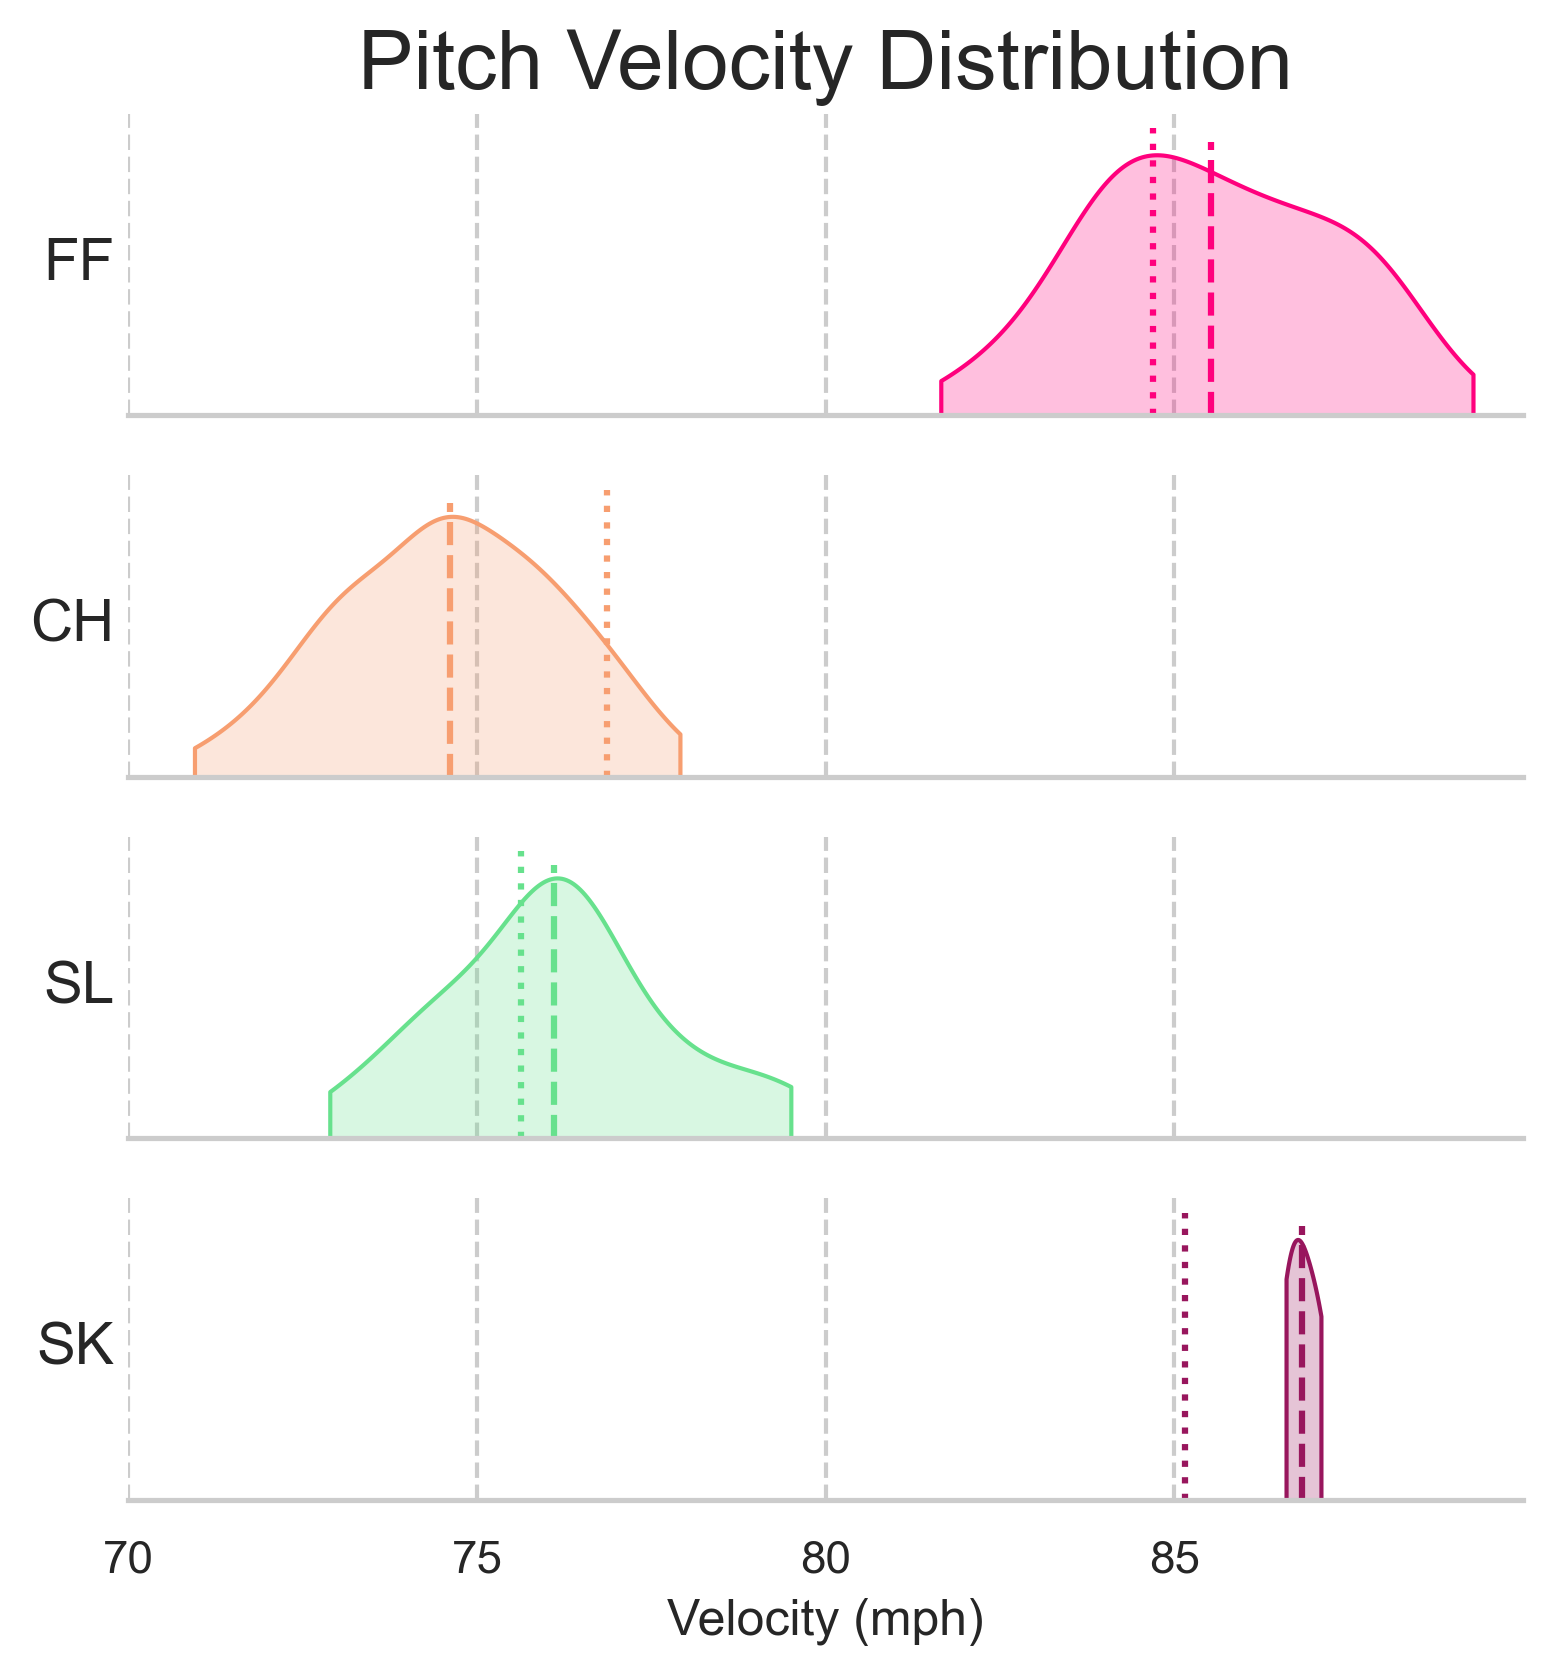

In [289]:
import math
import matplotlib.gridspec as gridspec

def velocity_kdes(df: pd.DataFrame,
                  ax: plt.Axes,
                  gs: gridspec,
                  gs_x: list,
                  gs_y: list,
                  fig: plt.Figure):

 # Get the count of each pitch type and sort them in descending order
    sorted_value_counts = df['pitch_type'].value_counts().sort_values(ascending=False)

    # Get the list of pitch types ordered from most to least frequent
    items_in_order = sorted_value_counts.index.tolist()

# Turn off the axis and set the title for the main plot
    ax.axis('off')
    ax.set_title('Pitch Velocity Distribution', fontdict={'size': 20})

    # Create a grid for the inner subplots
    inner_grid_1 = gridspec.GridSpecFromSubplotSpec(len(items_in_order), 1, subplot_spec=gs[gs_x[0]:gs_x[-1], gs_y[0]:gs_y[-1]])
    ax_top = []

    # Create subplots for each pitch type
    for inner in inner_grid_1:
        ax_top.append(fig.add_subplot(inner))

    ax_number = 0

    # Loop through each pitch type and plot the velocity distribution
    for i in items_in_order:
        # Check if all release speeds for the pitch type are the same
        if np.unique(df[df['pitch_type'] == i]['release_speed']).size == 1:
            # Plot a single line if all values are the same
            ax_top[ax_number].plot([np.unique(df[df['pitch_type'] == i]['release_speed']),
                                    np.unique(df[df['pitch_type'] == i]['release_speed'])], [0, 1], linewidth=4,
                                   color=dict_colour[df[df['pitch_type'] == i]['pitch_type'].values[0]], zorder=20)
        else:
            # Plot the KDE for the release speeds
            sns.kdeplot(df[df['pitch_type'] == i]['release_speed'], ax=ax_top[ax_number], fill=True,
                        clip=(df[df['pitch_type'] == i]['release_speed'].min(), df[df['pitch_type'] == i]['release_speed'].max()),
                        color=dict_colour[df[df['pitch_type'] == i]['pitch_type'].values[0]])

# Plot the mean release speed for the current data
        df_average = df[df['pitch_type'] == i]['release_speed']
        ax_top[ax_number].plot([df_average.mean(), df_average.mean()],
                               [ax_top[ax_number].get_ylim()[0], ax_top[ax_number].get_ylim()[1]],
                               color=dict_colour[df[df['pitch_type'] == i]['pitch_type'].values[0]],
                               linestyle='--')

        df_average2 = df_all[df_all['pitch_type'] == i]['release_speed']
        ax_top[ax_number].plot([df_average2.mean(), df_average2.mean()],
                               [ax_top[ax_number].get_ylim()[0], ax_top[ax_number].get_ylim()[1]],
                               color=dict_colour[df[df['pitch_type'] == i]['pitch_type'].values[0]],
                               linestyle=':')

 # Set the x-axis limits
        ax_top[ax_number].set_xlim(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5)
        ax_top[ax_number].set_xlabel('')
        ax_top[ax_number].set_ylabel('')

        # Hide the top, right, and left spines for all but the last subplot
        if ax_number < len(items_in_order) - 1:
            ax_top[ax_number].spines['top'].set_visible(False)
            ax_top[ax_number].spines['right'].set_visible(False)
            ax_top[ax_number].spines['left'].set_visible(False)
            ax_top[ax_number].tick_params(axis='x', colors='none')

        # Set the x-ticks and y-ticks
        ax_top[ax_number].set_xticks(range(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5, 5))
        ax_top[ax_number].set_yticks([])
        ax_top[ax_number].grid(axis='x', linestyle='--')

        # Add text label for the pitch type
        ax_top[ax_number].text(-0.01, 0.5, i, transform=ax_top[ax_number].transAxes,
                               fontsize=14, va='center', ha='right')
        ax_number += 1

    # Hide the top, right, and left spines for the last subplot
    ax_top[-1].spines['top'].set_visible(False)
    ax_top[-1].spines['right'].set_visible(False)
    ax_top[-1].spines['left'].set_visible(False)

    # Set the x-ticks and x-label for the last subplot
    ax_top[-1].set_xticks(list(range(math.floor(df['release_speed'].min() / 5) * 5, math.ceil(df['release_speed'].max() / 5) * 5, 5)))
    ax_top[-1].set_xlabel('Velocity (mph)')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
velo_graph = velocity_kdes(df=df,
              ax=ax,
              gs=gridspec.GridSpec(1, 1),
              gs_x=[0, 1],
              gs_y=[0, 1],
              fig=fig)

velo_graph


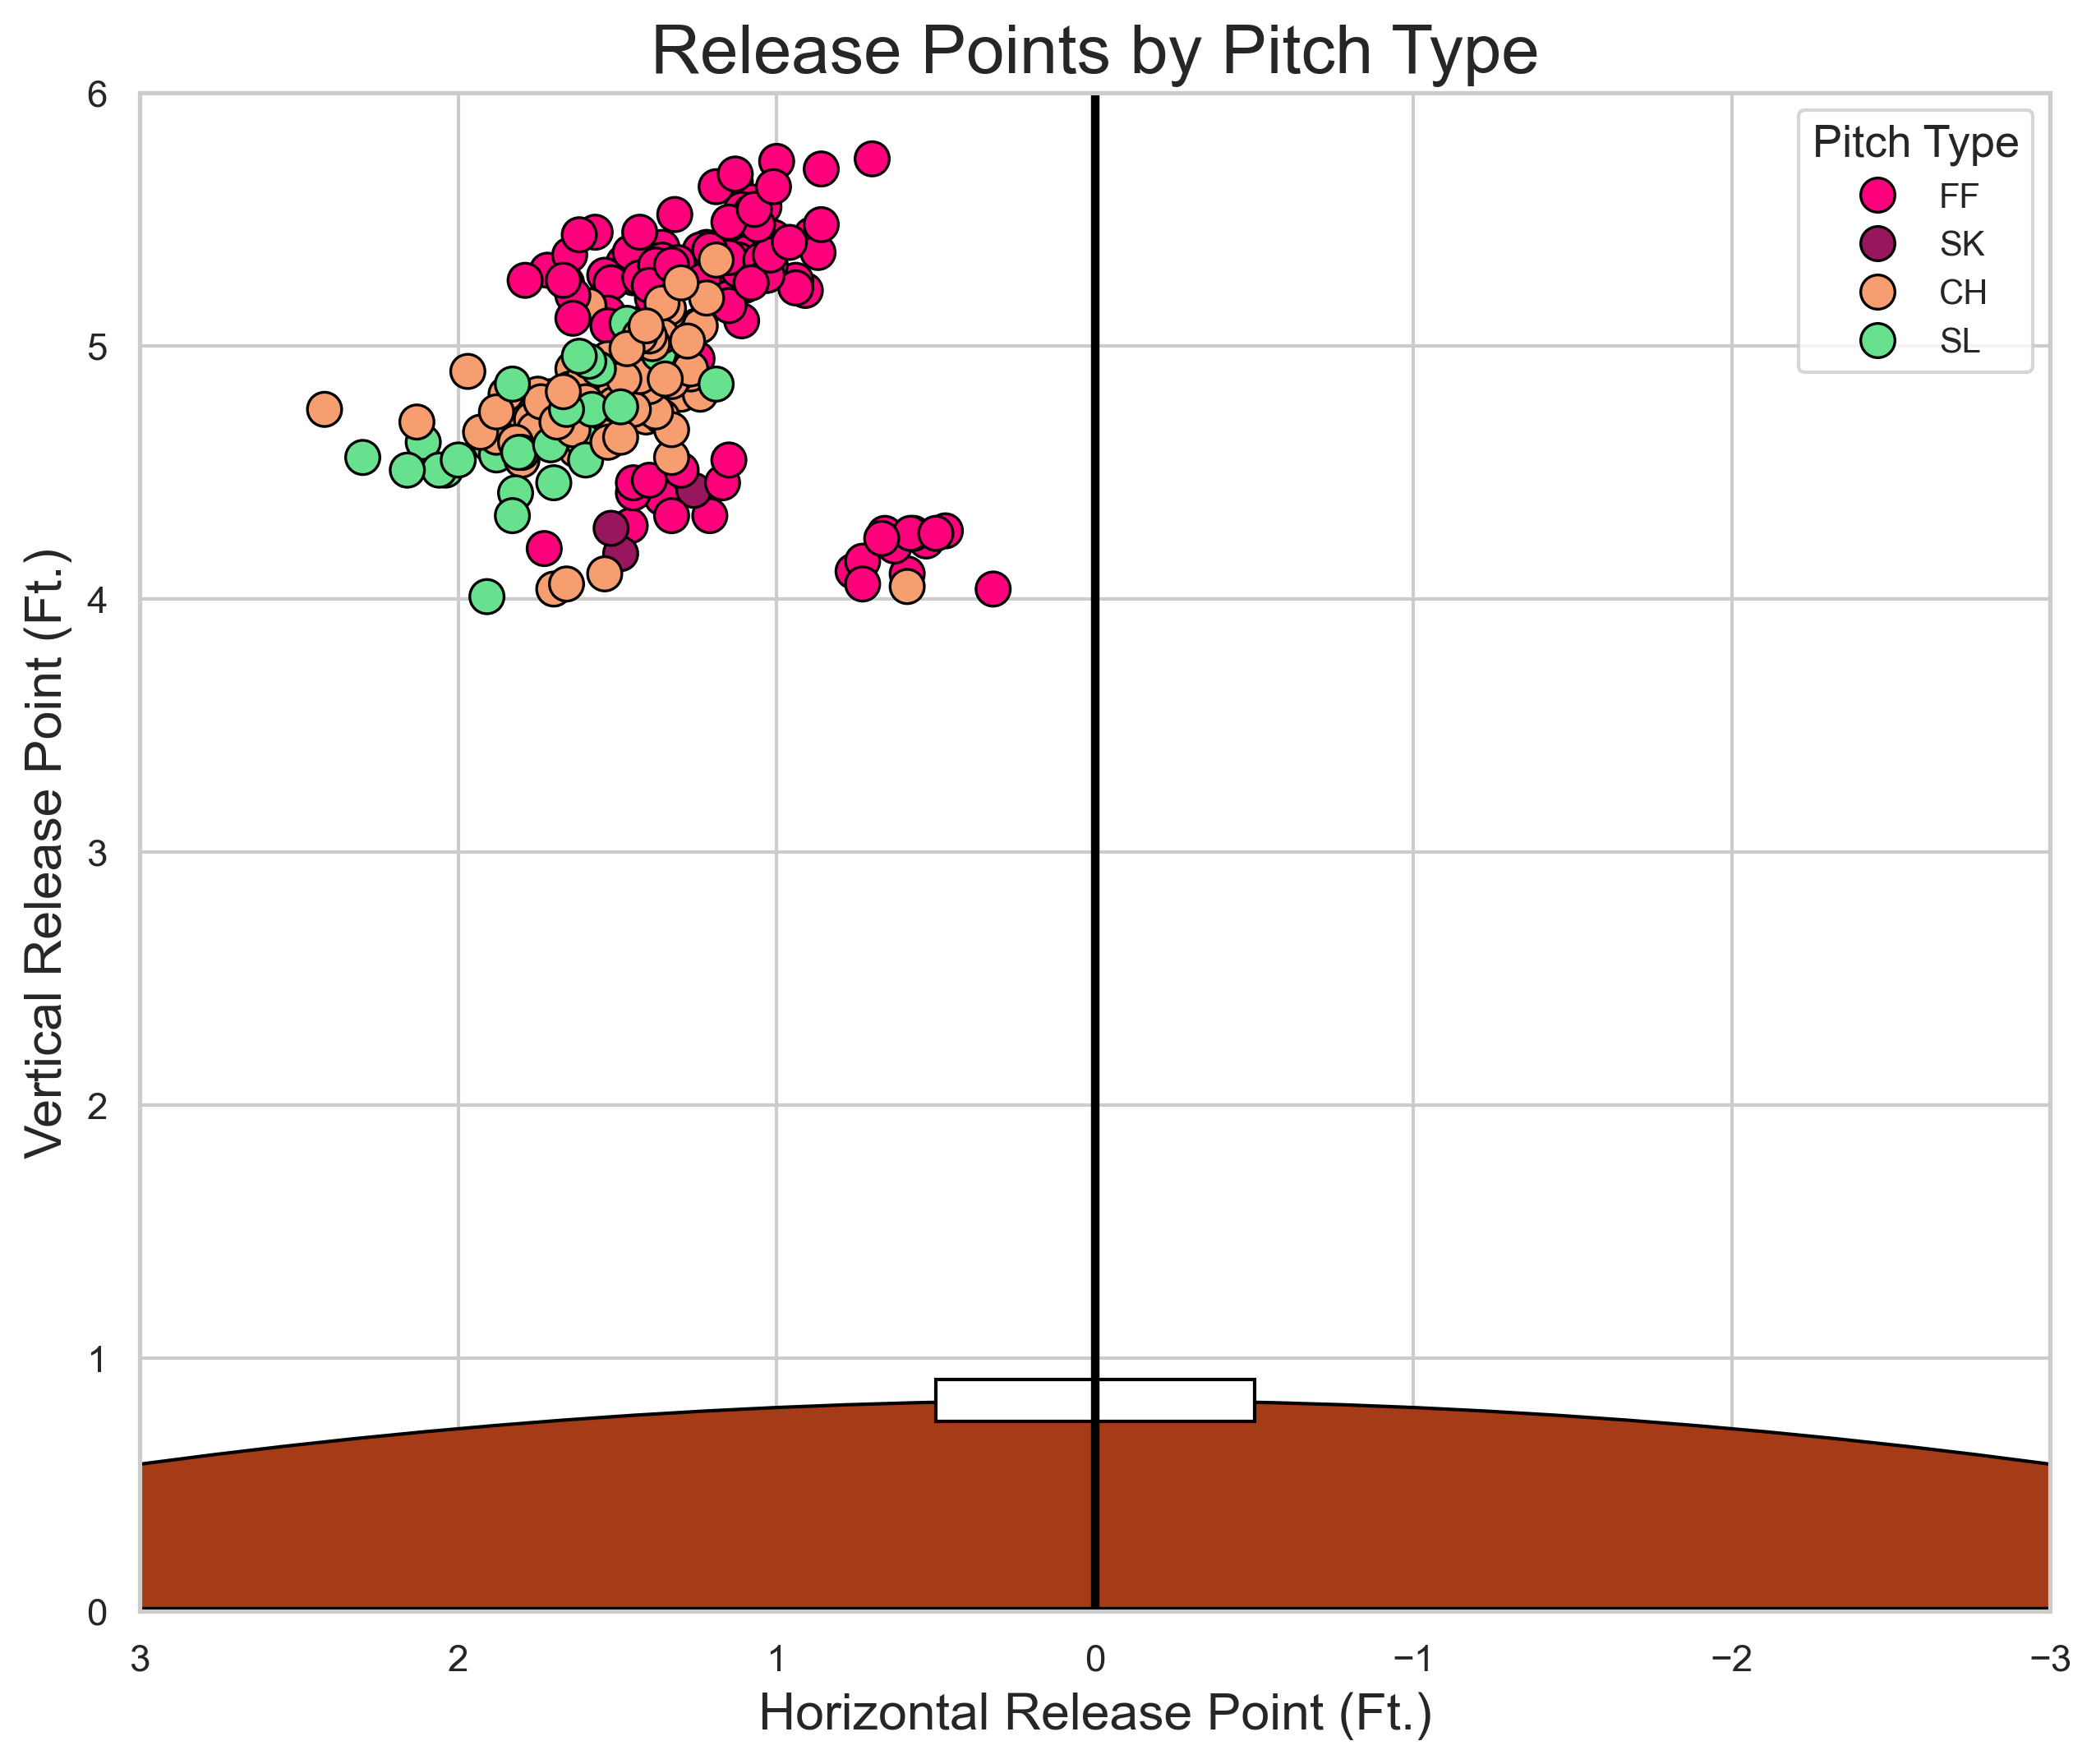

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['relY'] >= 4]

def plot_release_points(df, ax):

    
    # Set plot style
    sns.set(style="whitegrid")


    # Create a scatter plot on the provided ax, grouping by pitch_type with the custom 'pitch_colours' palette
    scatter = sns.scatterplot(
        data=df,
        x='relX', y='relY', 
        hue='pitch_type', palette=dict_colour,  # Use custom pitch_colours palette
        s=100, edgecolor='black', legend='full', ax=ax
    )

    ax.add_patch(plt.Circle((0, 10 / 12 - 18), radius=18, edgecolor='black', facecolor='#a63b17'))
    ax.add_patch(plt.Rectangle((-0.5, 9 / 12), 1, 1 / 6, edgecolor='black', facecolor='white'))
    
    # Customize the plot
    scatter.set_title('Release Points by Pitch Type', fontsize=20)
    scatter.set_xlabel('Horizontal Release Point (Ft.)', fontsize=15)
    scatter.set_ylabel('Vertical Release Point (Ft.)', fontsize=15)
    
    # Set the x and y axis limits to -10, 10
    scatter.set_xlim(3, -3)
    scatter.set_ylim(-0, 6)
    
    # Bold the x=0 and y=0 lines
    ax.axvline(x=0, color='black', linewidth=2.5)  # Bold vertical line where x=0
    ax.axhline(y=0, color='black', linewidth=2.5)  # Bold horizontal line where y=0

    # Show the legend
    ax.legend(title='Pitch Type', title_fontsize='13', fontsize='10')

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 8))

# Call the function with the loaded DataFrame and the axis
release_plot = plot_release_points(df, ax)

release_plot


In [291]:
def convert_time_to_fractional_hours(time_str):
    """Convert time string in the format HH:MM to a fractional hour and reflect."""
    hour, minute = map(int, time_str.split(':'))
    fractional_hour = hour % 12 + minute / 60.0  # Convert to fractional hour
    
    # Reflect the fractional hour across the vertical axis of the clock
    reflected_fractional_hour = 12 - fractional_hour if fractional_hour != 12 else 12
    return reflected_fractional_hour

df['spin_fractional'] = df['spin_direction'].apply(convert_time_to_fractional_hours)

C:\Users\chame\AppData\Local\Temp\ipykernel_37772\3514415696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spin_fractional'] = df['spin_direction'].apply(convert_time_to_fractional_hours)


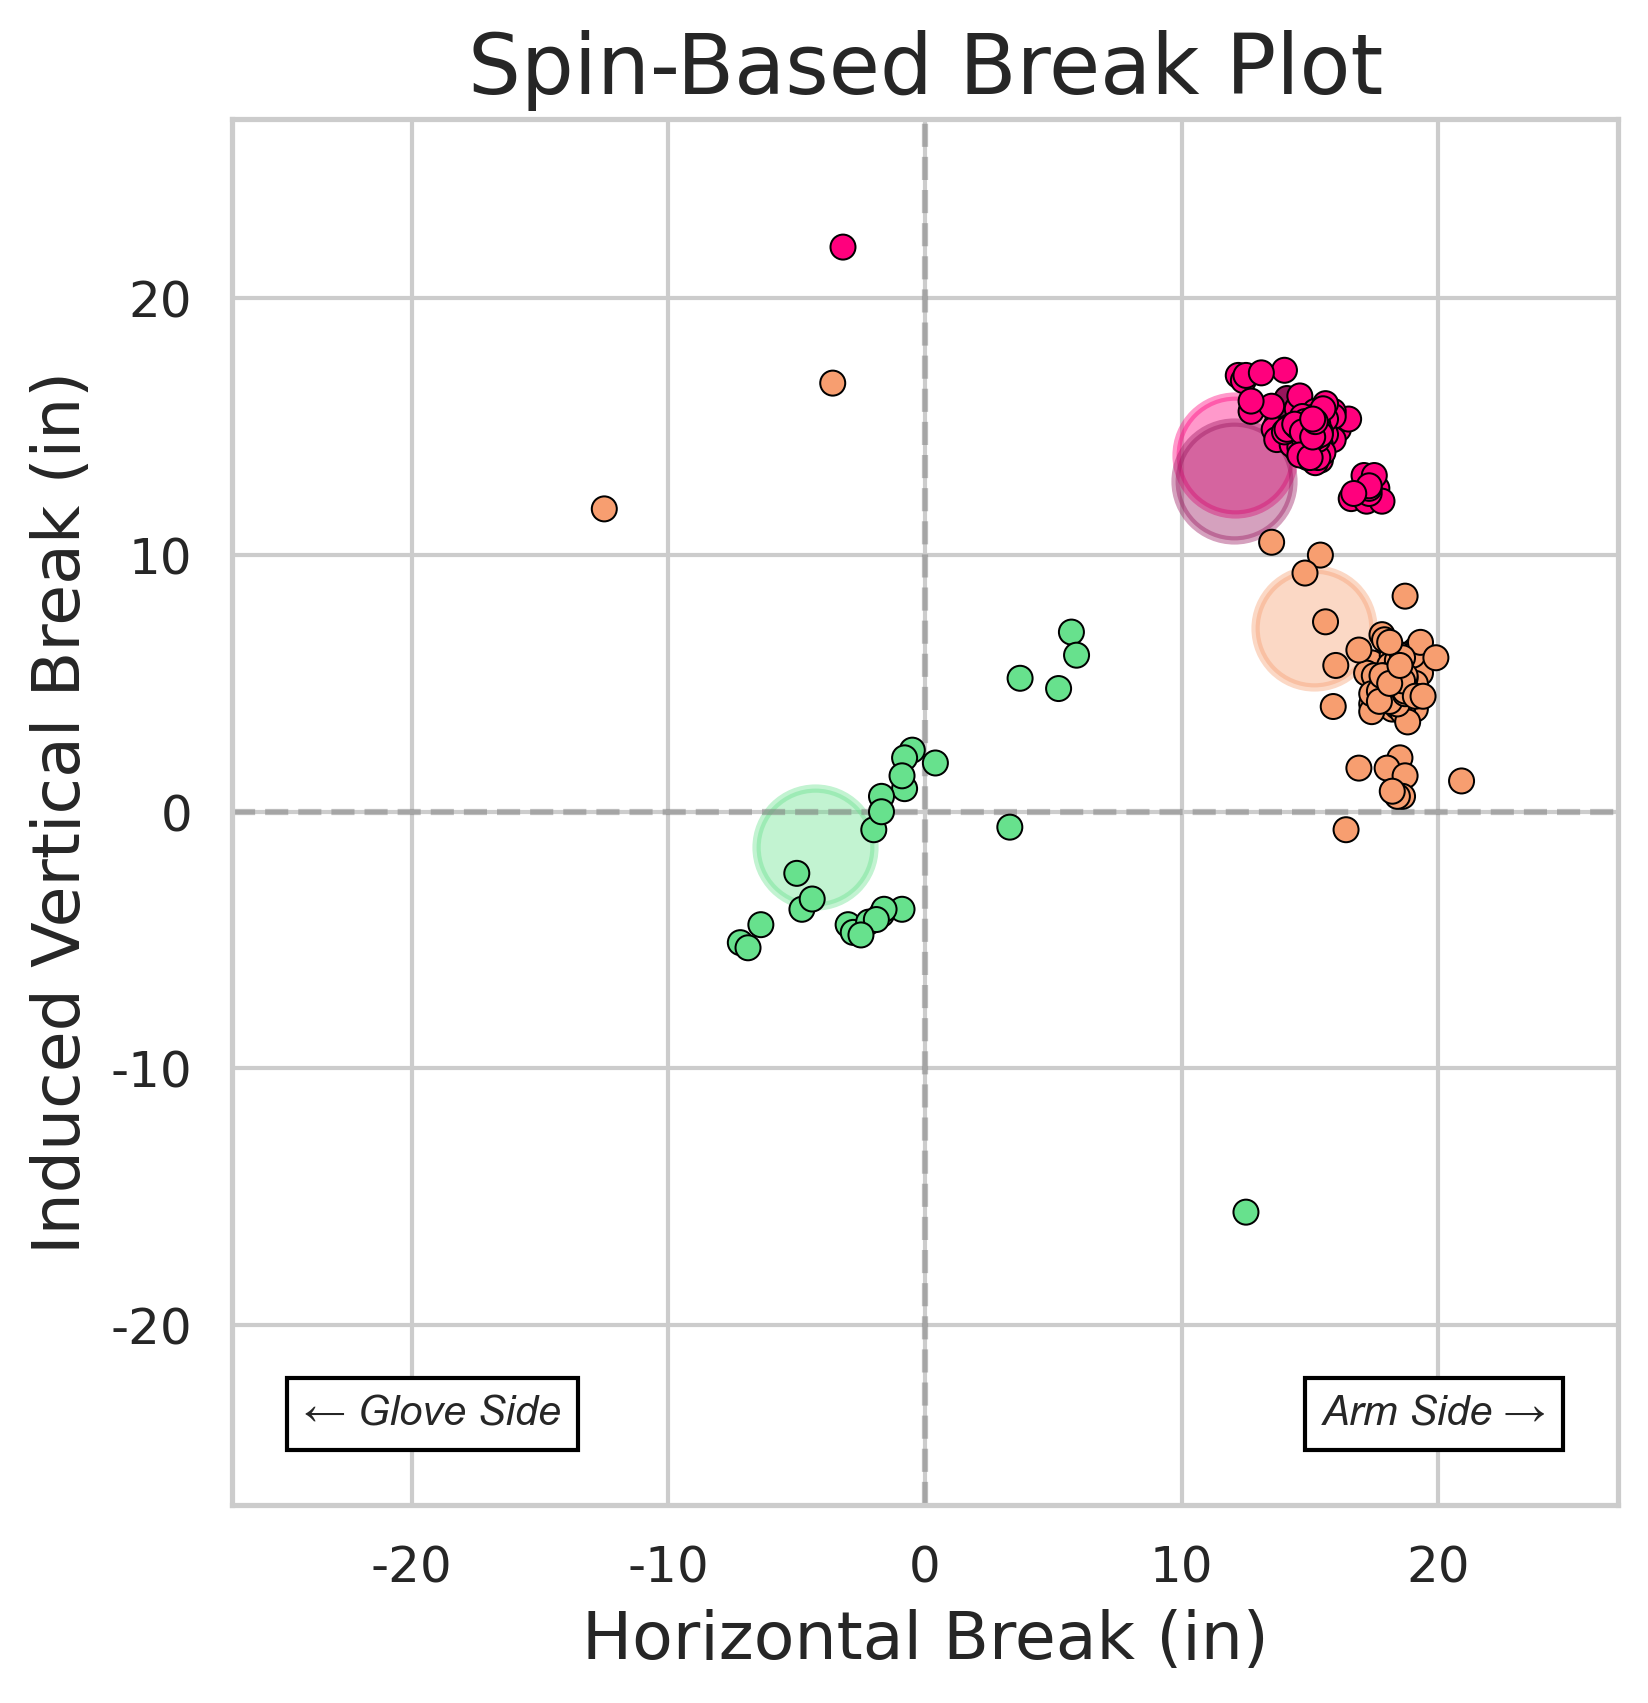

In [292]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def break_plot(df: pd.DataFrame, df_all: pd.DataFrame, ax: plt.Axes):
    
    # Get the throwing hand of the pitcher
    pitcher_throws = df['p_throws'].values[0]

    # Get the list of pitch types that the specific pitcher throws
    pitcher_pitch_types = df['pitch_type'].unique()

    # Filter df_all to only include pitchers who throw with the same hand and the same pitch types
    same_side_df_all = df_all[(df_all['p_throws'] == pitcher_throws) & 
                              (df_all['pitch_type'].isin(pitcher_pitch_types))]

    # Calculate the team average movement for each pitch type (same side only)
    avg_movement_team = same_side_df_all.groupby('pitch_type').agg({'hb': 'mean', 'ivb': 'mean'}).reset_index()

    # Adjust for left-handed pitchers (for individual pitches)
    if pitcher_throws == 'L':
        avg_movement_team['hb'] *= -1

    # Plot the scatterplot for individual pitches
    sns.scatterplot(ax=ax,
                    x=df['hb'] if pitcher_throws == 'R' else df['hb'] * -1,
                    y=df['ivb'],
                    hue=df['pitch_type'],
                    palette=dict_colour,
                    ec='black',
                    alpha=1,
                    zorder=2)

    # Plot filled circles for the team average movement of each pitch type (same side pitchers)
    for _, row in avg_movement_team.iterrows():
        ax.scatter(x=row['hb'], y=row['ivb'],
                   s=800,  # Circle size
                   facecolors=dict_colour[row['pitch_type']],  # Filled circle
                   edgecolors=dict_colour[row['pitch_type']],  # Match edge color to pitch type
                   linewidth=2,
                   alpha=0.4,  # Softer effect for the team average circles
                   zorder=1)

    # Draw horizontal and vertical lines at y=0 and x=0 respectively
    ax.axhline(y=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)
    ax.axvline(x=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)

    # Set the labels for the x and y axes
    ax.set_xlabel('Horizontal Break (in)', fontdict=font_properties_axes)
    ax.set_ylabel('Induced Vertical Break (in)', fontdict=font_properties_axes)

    # Set the title of the plot
    ax.set_title("Spin-Based Break Plot", fontdict=font_properties_titles)

    # Remove the legend
    ax.get_legend().remove()

    # Set the tick positions and labels for the x and y axes
    ax.set_xticks(range(-20, 24, 10))
    ax.set_xticklabels(range(-20, 24, 10), fontdict=font_properties)
    ax.set_yticks(range(-20, 24, 10))
    ax.set_yticklabels(range(-20, 24, 10), fontdict=font_properties)

    # Set the limits for the x and y axes
    ax.set_xlim((-27, 27))
    ax.set_ylim((-27, 27))

    # Add text annotations based on the pitcher's throwing hand
    if pitcher_throws == 'R':
        ax.text(-24.2, -24.2, s='← Glove Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.text(24.2, -24.2, s='Arm Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
    else:
        ax.text(24.2, -24.2, s='← Arm Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.text(-24.2, -24.2, s='Glove Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.invert_xaxis()

    # Set the aspect ratio of the plot to be equal
    ax.set_aspect('equal', adjustable='box')

    # Format the x and y axis tick labels as integers
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


plot_break = break_plot(df=df, df_all=df_all, ax=plt.subplots(figsize=(6, 6))[1])
plot_break


C:\Users\chame\AppData\Local\Temp\ipykernel_37772\2810891452.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_HB'] = zscore(df['HB'])
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\2810891452.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_IVB'] = zscore(df['IVB'])


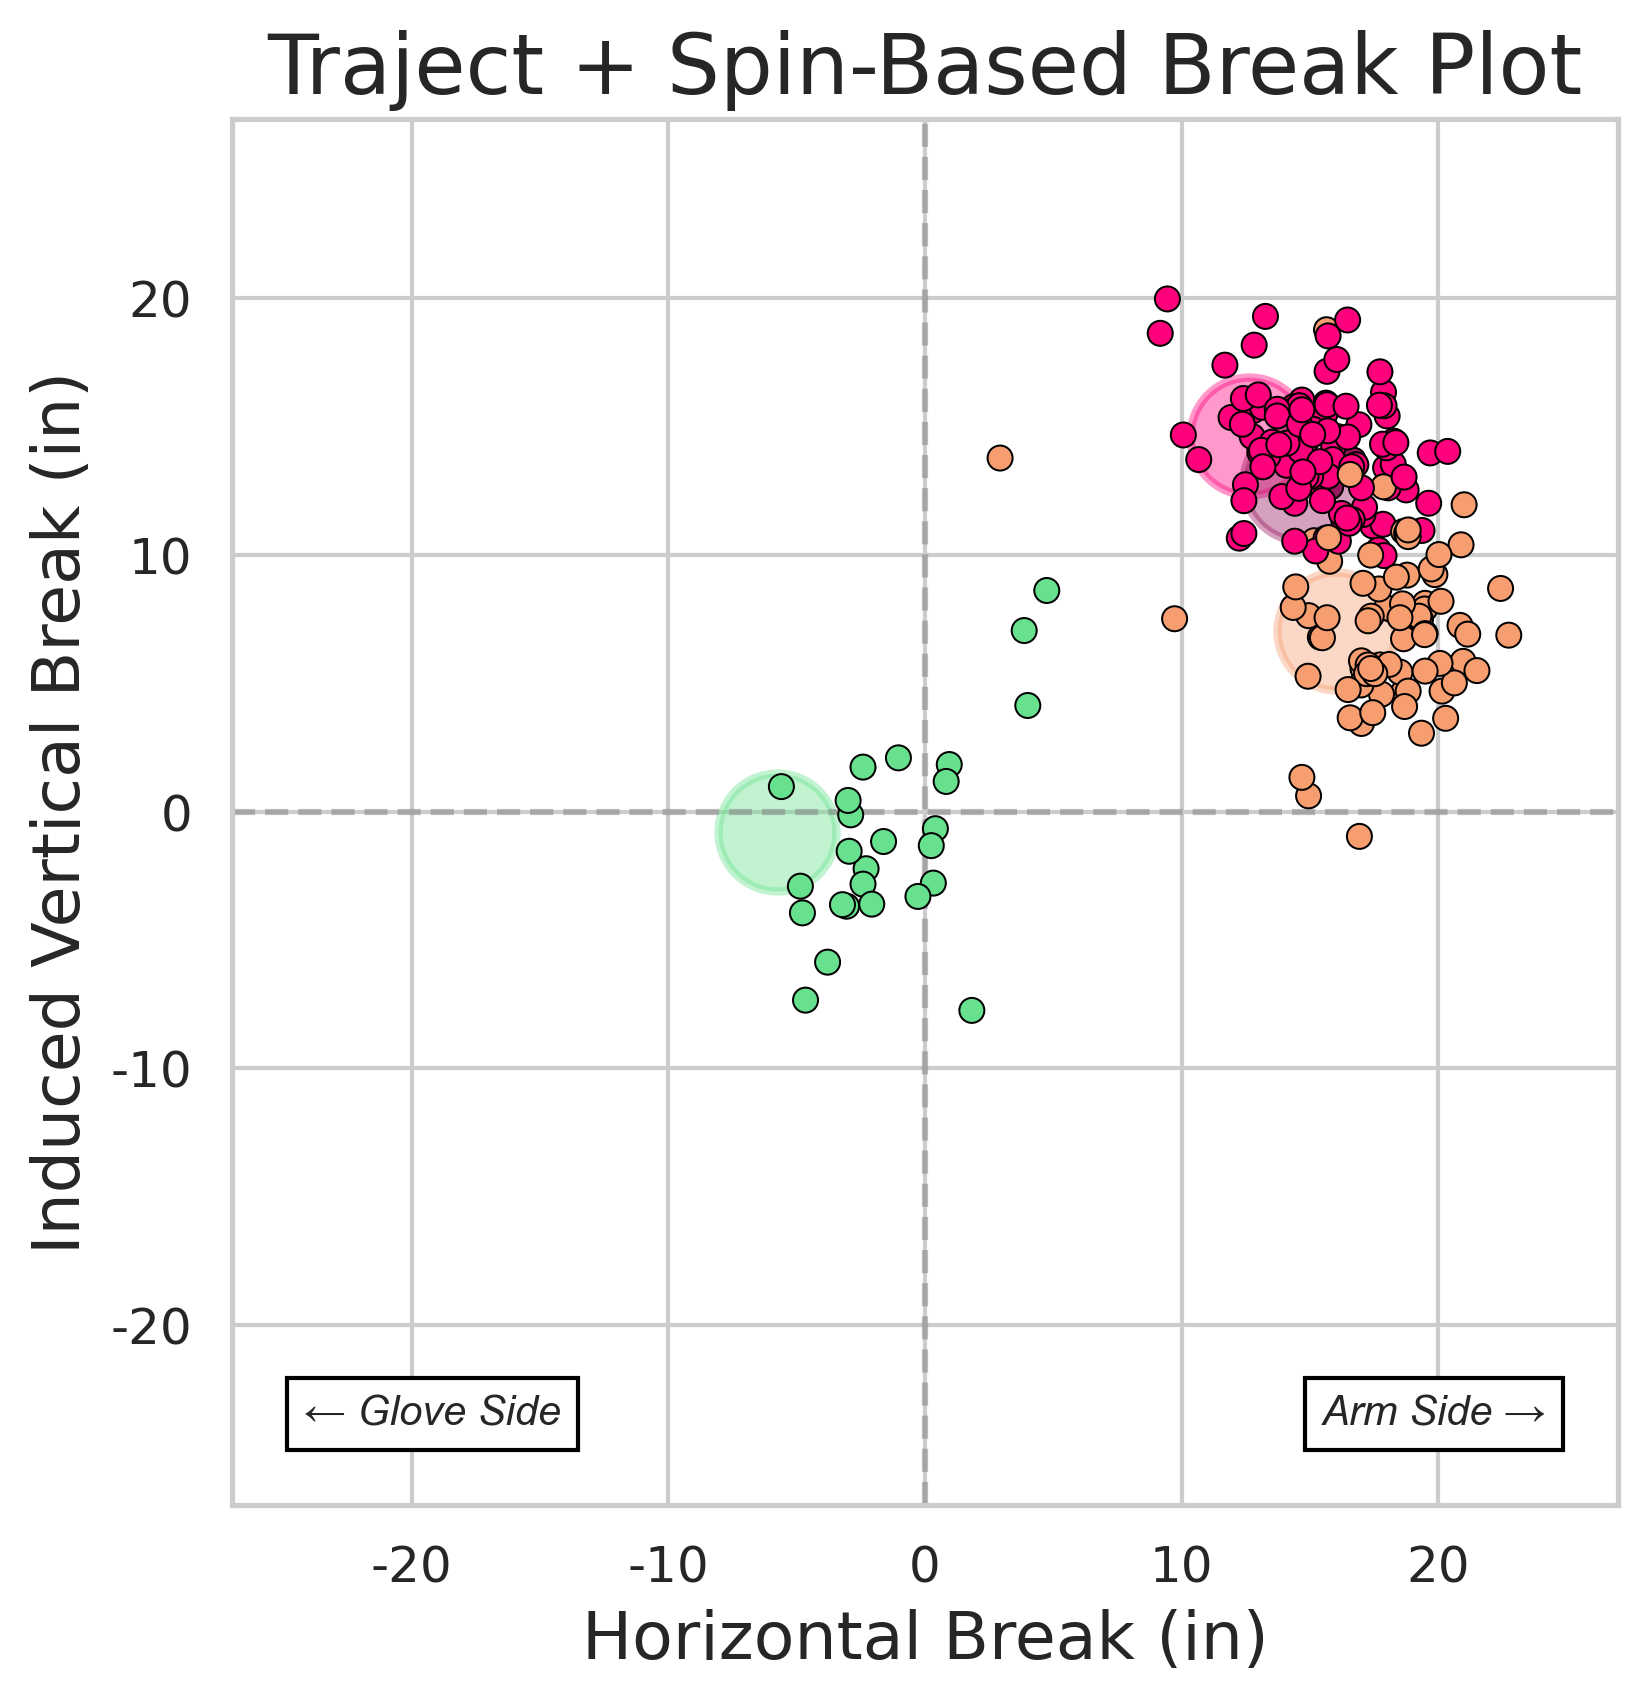

In [293]:
import numpy as np
from scipy.stats import zscore

def break_plot2(df: pd.DataFrame, df_all: pd.DataFrame, ax: plt.Axes):
    
    # Get the throwing hand of the pitcher
    pitcher_throws = df['p_throws'].values[0]

    # Get the list of pitch types that the specific pitcher throws
    pitcher_pitch_types = df['pitch_type'].unique()

    # Filter df_all to only include pitchers who throw with the same hand and the same pitch types
    same_side_df_all = df_all[(df_all['p_throws'] == pitcher_throws) & 
                              (df_all['pitch_type'].isin(pitcher_pitch_types))]

    # Remove outliers for the chosen pitcher using z-score method (threshold of 3 standard deviations)
    df['z_HB'] = zscore(df['HB'])
    df['z_IVB'] = zscore(df['IVB'])
    df_filtered = df[(np.abs(df['z_HB']) < 3) & (np.abs(df['z_IVB']) < 3)]
    
    # Drop the z-score columns after filtering
    df_filtered = df_filtered.drop(columns=['z_HB', 'z_IVB'])

    # Calculate the team average movement for each pitch type (same side only)
    avg_movement_team = same_side_df_all.groupby('pitch_type').agg({'HB': 'mean', 'IVB': 'mean'}).reset_index()

    # Adjust for left-handed pitchers (for individual pitches)
    if pitcher_throws == 'L':
        avg_movement_team['HB'] *= -1

    # Plot the scatterplot for individual (outlier-removed) pitches
    sns.scatterplot(ax=ax,
                    x=df_filtered['HB'] if pitcher_throws == 'R' else df_filtered['HB'] * -1,
                    y=df_filtered['IVB'],
                    hue=df_filtered['pitch_type'],
                    palette=dict_colour,
                    ec='black',
                    alpha=1,
                    zorder=2)

    # Plot filled circles for the team average movement of each pitch type (same side pitchers)
    for _, row in avg_movement_team.iterrows():
        ax.scatter(x=row['HB'], y=row['IVB'],
                   s=800,  # Circle size
                   facecolors=dict_colour[row['pitch_type']],  # Filled circle
                   edgecolors=dict_colour[row['pitch_type']],  # Match edge color to pitch type
                   linewidth=2,
                   alpha=0.4,  # Softer effect for the team average circles
                   zorder=1)

    # Draw horizontal and vertical lines at y=0 and x=0 respectively
    ax.axhline(y=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)
    ax.axvline(x=0, color='#808080', alpha=0.5, linestyle='--', zorder=1)

    # Set the labels for the x and y axes
    ax.set_xlabel('Horizontal Break (in)', fontdict=font_properties_axes)
    ax.set_ylabel('Induced Vertical Break (in)', fontdict=font_properties_axes)

    # Set the title of the plot
    ax.set_title("Traject + Spin-Based Break Plot", fontdict=font_properties_titles)

    # Remove the legend
    ax.get_legend().remove()

    # Set the tick positions and labels for the x and y axes
    ax.set_xticks(range(-20, 24, 10))
    ax.set_xticklabels(range(-20, 24, 10), fontdict=font_properties)
    ax.set_yticks(range(-20, 24, 10))
    ax.set_yticklabels(range(-20, 24, 10), fontdict=font_properties)

    # Set the limits for the x and y axes
    ax.set_xlim((-27, 27))
    ax.set_ylim((-27, 27))

    # Add text annotations based on the pitcher's throwing hand
    if pitcher_throws == 'R':
        ax.text(-24.2, -24.2, s='← Glove Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.text(24.2, -24.2, s='Arm Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
    else:
        ax.text(24.2, -24.2, s='← Arm Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.text(-24.2, -24.2, s='Glove Side →', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=10, zorder=3)
        ax.invert_xaxis()

    # Set the aspect ratio of the plot to be equal
    ax.set_aspect('equal', adjustable='box')

    # Format the x and y axis tick labels as integers
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plot_break2 = break_plot2(df=df, df_all=df_all, ax=plt.subplots(figsize=(6, 6))[1])
plot_break2

In [294]:
def df_grouping(df: pd.DataFrame):
    # Group the DataFrame by pitch type and aggregate various statistics
    df_group = df.groupby(['pitch_type']).agg(
                        pitch = ('pitch_type','count'),  # Count of pitches
                        release_speed = ('release_speed','mean'),  # Average release speed
                        ivb = ('IVB','mean'),  # Average vertical movement
                        hb = ('HB','mean'),  # Average horizontal movement
                        release_spin_rate = ('total_spin','mean'),  #Average spin rate
                        spin_eff = ('spin_eff', 'mean'), #Average Spin Efficiency
                        relX = ('relX','mean'),  # Average horizontal release position
                        relY = ('relY','mean'),  # Average vertical release position
                        spin_fractional = ('spin_fractional', 'mean') #Average spin direction
                        ).reset_index()

    # Map pitch types to their descriptions
    df_group['pitch_description'] = df_group['pitch_type'].map(dict_pitch)

    df_group['pitch_usage'] = df_group['pitch'] / df_group['pitch'].sum()

    # Map pitch types to their colours
    df_group['colour'] = df_group['pitch_type'].map(dict_colour)

    # Sort the DataFrame by pitch usage in descending order
    df_group = df_group.sort_values(by='pitch', ascending=False)
    colour_list = df_group['colour'].tolist()

    plot_table_all = pd.DataFrame(data={
                'pitch_type': 'All',
                'pitch_description': 'All',  # Description for the summary row
                'pitch': df['pitch_type'].count(),  # Total count of pitches
                'pitch_usage': 1,
                'release_speed': np.nan,  # Placeholder for release speed
                'ivb': np.nan,  # Placeholder for vertical movement
                'hb': np.nan,  # Placeholder for horizontal movement
                'release_spin_rate': np.nan,  # Placeholder for spin rate
                'spin_eff': np.nan, #PLaceholder for Spin Efficiency
                'relX': np.nan,  # Placeholder for horizontal release position
                'relY': np.nan,  # Placeholder for vertical release position
                'spin_fractional': np.nan, #Placeholder for spin axis
            }, index=[0])

    # Concatenate the group DataFrame with the summary row DataFrame
    df_plot = pd.concat([df_group, plot_table_all], ignore_index=True)
    

    return df_plot, colour_list

In [295]:
pitch_stats_dict = {
    'pitch': {'table_header': '$\\bf{Count}$', 'format': '.0f'},
    'pitch_usage': {'table_header': '$\\bf{Usage\%}$', 'format': '.1%'},
    'release_speed': {'table_header': '$\\bf{Velocity}$', 'format': '.1f'},
    'ivb': {'table_header': '$\\bf{iVB}$', 'format': '.1f'},
    'hb': {'table_header': '$\\bf{HB}$', 'format': '.1f'},
    'release_spin_rate': {'table_header': '$\\bf{Spin}$', 'format': '.0f'},
    'spin_eff': {'table_header': '$\\bf{Eff\%}$', 'format': '.1f'},
    'relX': {'table_header': '$\\bf{hRel}$', 'format': '.1f'},
    'relY': {'table_header': '$\\bf{vRel}$', 'format': '.1f'},
    'ext': {'table_header': '$\\bf{Ext}$', 'format': '.1f'},
    'spin_fractional': {'table_header': '$\\bf{Axis}$', 'format': '.2f'},
    }

table_columns = [ 'pitch_description',
            'pitch',
            'pitch_usage',
            'release_speed',
            'ivb',
            'hb',
            'release_spin_rate',
            'spin_eff',
            'relX',
            'relY',
            'spin_fractional',
            ]

<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\1637907184.py:3: SyntaxWarning: invalid escape sequence '\%'
  'pitch_usage': {'table_header': '$\\bf{Usage\%}$', 'format': '.1%'},
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\1637907184.py:8: SyntaxWarning: invalid escape sequence '\%'
  'spin_eff': {'table_header': '$\\bf{Eff\%}$', 'format': '.1f'},


In [296]:
def plot_pitch_format(df: pd.DataFrame):
    # Create a DataFrame for the summary row with aggregated statistics for all pitches
    df_group = df[table_columns].fillna('—')

    # Apply the formats to the DataFrame
    # Iterate over each column in pitch_stats_dict
    for column, props in pitch_stats_dict.items():
        # Check if the column exists in df_plot
        if column in df_group.columns:
            # Apply the specified format to the column values
            df_group[column] = df_group[column].apply(lambda x: format(x, props['format']) if isinstance(x, (int, float)) else x)
    return df_group

In [297]:
import matplotlib
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Define color maps
cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF','#FFFFFF','#FFB000'])
cmap_sum_r = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#FFB000','#FFFFFF','#648FFF'])

# List of statistics to color
colour_stats = ['release_speed', 'relY']

### GET COLOURS ###
def get_color(value, normalize, cmap_sum):
    color = cmap_sum(normalize(value))
    return mcolors.to_hex(color)

def get_cell_colouts(df_group: pd.DataFrame,
                     df_all: pd.DataFrame,
                     colour_stats: list,
                     cmap_sum: matplotlib.colors.LinearSegmentedColormap,
                     cmap_sum_r: matplotlib.colors.LinearSegmentedColormap):
    colour_list_df = []
    for pt in df_group.pitch_type.unique():
        colour_list_df_inner = []
        select_df = df_all[df_all['pitch_type'] == pt]
        df_group_select = df_group[df_group['pitch_type'] == pt]

        for tb in table_columns:

            if tb in colour_stats and type(df_group_select[tb].values[0]) == np.float64:
                if np.isnan(df_group_select[tb].values[0]):
                    colour_list_df_inner.append('#ffffff')
                elif tb == 'release_speed':
                    normalize = mcolors.Normalize(vmin=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 0.95,
                                                  vmax=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 1.05)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum))
                else:
                    normalize = mcolors.Normalize(vmin=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 0.7,
                                                  vmax=(pd.to_numeric(select_df[tb], errors='coerce')).mean() * 1.3)
                    colour_list_df_inner.append(get_color((pd.to_numeric(df_group_select[tb], errors='coerce')).mean(), normalize, cmap_sum))
            else:
                colour_list_df_inner.append('#ffffff')
        colour_list_df.append(colour_list_df_inner)
    return colour_list_df

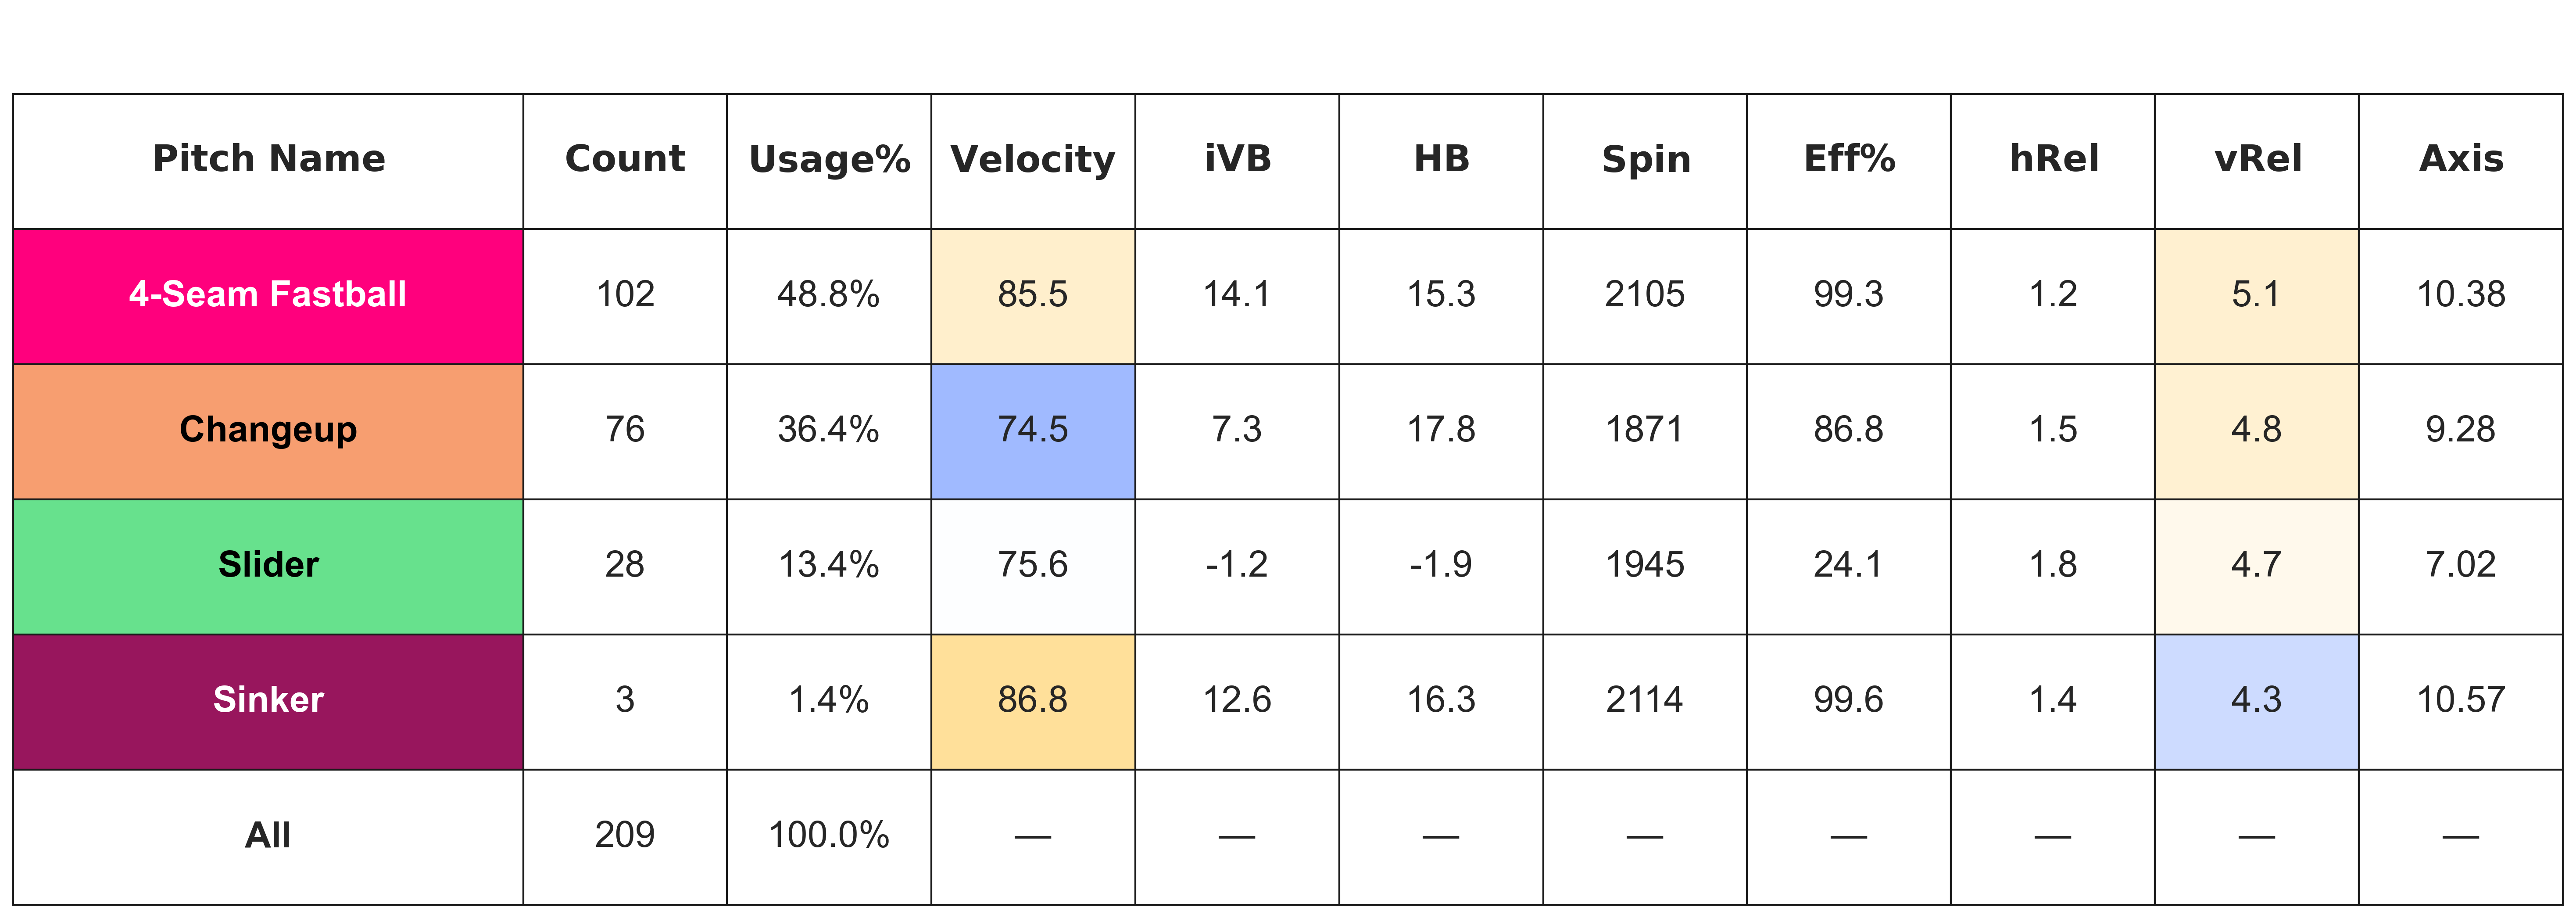

In [298]:
def pitch_table(df: pd.DataFrame, ax: plt.Axes,fontsize:int=20):
    df_group, colour_list = df_grouping(df)
    colour_list_df = get_cell_colouts(df_group, df_all, colour_stats, cmap_sum, cmap_sum_r)
    df_plot = plot_pitch_format(df_group)

    # Create a table plot with the DataFrame values and specified column labels
    table_plot = ax.table(cellText=df_plot.values, colLabels=table_columns, cellLoc='center',
                        bbox=[0, -0.1, 1, 1],
                        colWidths=[2.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        cellColours=colour_list_df)

    # Disable automatic font size adjustment and set the font size
    table_plot.auto_set_font_size(False)

    table_plot.set_fontsize(fontsize)

    # Scale the table plot
    table_plot.scale(1, 0.5)

    # Correctly format the new column names using LaTeX formatting
    new_column_names = ['$\\bf{Pitch\\ Name}$'] + [pitch_stats_dict[x]['table_header'] if x in pitch_stats_dict else '---' for x in table_columns[1:]]

    # Update the table headers with the new column names
    for i, col_name in enumerate(new_column_names):
        table_plot.get_celld()[(0, i)].get_text().set_text(col_name)

    # Bold the first column in the table
    for i in range(len(df_plot)):
        table_plot.get_celld()[(i+1, 0)].get_text().set_fontweight('bold')

    # Set the color for the first column, all rows except header and last
    for i in range(1, len(df_plot)):
        # Check if the pitch type is in the specified list
        if table_plot.get_celld()[(i, 0)].get_text().get_text() in ['Split-Finger', 'Slider', 'Changeup']:
            table_plot.get_celld()[(i, 0)].set_text_props(color='#000000', fontweight='bold')
        else:
            table_plot.get_celld()[(i, 0)].set_text_props(color='#FFFFFF')
        # Set the background color of the cell
        table_plot.get_celld()[(i, 0)].set_facecolor(colour_list[i-1])

    # Remove the axis
    ax.axis('off')

pitch_table(df = df, ax = plt.subplots(figsize=(25, 8))[1])

In [299]:
def dfp_grouping(dfp: pd.DataFrame):
    # Group the DataFrame by pitch type and aggregate various statistics
    dfp_group = dfp.groupby(['pitch_type']).agg(
                        pitch2 = ('pitches','sum'),  # Count of pitches 
                        fip = ('fip', 'sum'),  
                        slg = ('slg','sum'),  
                        k_rate = ('k_rate','sum'),  
                        bb_rate = ('bb_rate','sum'),  
                        k_bb_rate = ('k_bb_rate', 'sum'),
                        gb_rate = ('gb_rate','sum'),  
                        ld_rate = ('ld_rate','sum'),  
                        offb_rate = ('offb_rate', 'sum'), 
                        iffb_rate = ('iffb_rate', 'sum'),
                        hh_rate = ('hh_rate', 'sum'),
                        whiff_rate = ('whiff_rate', 'sum'),
                        csw_rate = ('csw_rate', 'sum'),
                        freebase9 = ('freebase9', 'sum'),
                        spot = ('spot', 'sum'),
                        ).reset_index()

    dfp_group['pitch_description'] = dfp_group['pitch_type'].map(dict_pitch)
    # Map pitch types to their colours
    dfp_group['colour'] = dfp_group['pitch_type'].map(dict_colour)
    colour_list2 = dfp_group['colour'].tolist()
    
    # Sort the DataFrame by pitch usage in descending order
    dfp_group = dfp_group.sort_values(by='pitch_type', ascending=True)
    

    plot_table_all = pd.DataFrame(data={
                'pitch_type': 'All',
                'pitch_description': 'All',  # Description for the summary row
                'pitch2': dfp['pitches'].sum(), # Total count of pitches
                'fip': np.nan,
                'slg': np.nan,  # Placeholder for release speed
                'k_rate': np.nan,  # Placeholder for vertical movement
                'bb_rate': np.nan,  # Placeholder for horizontal movement
                'k_bb_rate': np.nan,  # Placeholder for spin rate
                'gb_rate': np.nan, #PLaceholder for Spin Efficiency
                'ld_rate': np.nan,
                'offb_rate': np.nan,
                'iffb_rate': np.nan,
                'hh_rate': np.nan,  # Placeholder for horizontal release position
                'whiff_rate': np.nan,  # Placeholder for vertical release position
                'csw_rate': np.nan,
                'freebase9': np.nan,
                'spot': np.nan,
            }, index=[0])

    # Concatenate the group DataFrame with the summary row DataFrame
    dfp_plot = pd.concat([dfp_group, plot_table_all], ignore_index=True)


    return dfp_plot, colour_list2

In [300]:
pitch_stats_dict2 = {
    'pitch2': {'table_header': '$\\bf{Count}$', 'format': '.0f'},
    'fip': {'table_header': '$\\bf{FIP}$', 'format': '.3f'},
    'slg':{'table_header': '$\\bf{SLG}$', 'format': '.3f'},
    'k_rate': {'table_header': '$\\bf{K\%}$', 'format': '.0f'},
    'bb_rate': {'table_header': '$\\bf{BB\%}$', 'format': '.0f'},
    'k_bb_rate': {'table_header': '$\\bf{K-BB\%}$', 'format': '.0f'},
    'gb_rate': {'table_header': '$\\bf{GB\%}$', 'format': '.0f'},
    'ld_rate': {'table_header': '$\\bf{LD\%}$', 'format': '.0f'},
    'offb_rate': {'table_header': '$\\bf{OFFB\%}$', 'format': '.1%'},
    'iffb_rate': {'table_header': '$\\bf{IFFB\%}$', 'format': '.1f'},
    'hh_rate': {'table_header': '$\\bf{HH\%}$', 'format': '.1%'},
    'whiff_rate': {'table_header': '$\\bf{Whiff\%}$', 'format': '.1%'},
    'csw_rate': {'table_header': '$\\bf{CSW\%}$', 'format': '.1%'},
    'freebase9': {'table_header': '$\\bf{Free}$', 'format': '.1f'},
    'spot': {'table_header': '$\\bf{Spot\%}$', 'format': '.1%'},
    }

table_columns2 = [ 'pitch_description',
            'pitch2',
            'fip',
            'slg',
            'k_rate',
            'bb_rate',
            'k_bb_rate',
            'gb_rate',
            'ld_rate',
            'offb_rate',
            'iffb_rate',
            'hh_rate',
            'whiff_rate',
            'csw_rate',
            'freebase9',
            'spot',
            ]

<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:16: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequ

In [301]:
def plot_pitch_format2(dfp: pd.DataFrame):
    # Create a DataFrame for the summary row with aggregated statistics for all pitches
    dfp_group = dfp[table_columns2].fillna('—')

    # Apply the formats to the DataFrame
    # Iterate over each column in pitch_stats_dict2
    for column, props in pitch_stats_dict2.items():
        # Check if the column exists in df_plot
        if column in dfp_group.columns:
            # Apply the specified format to the column values
            dfp_group[column] = dfp_group[column].apply(lambda x: format(x, props['format']) if isinstance(x, (int, float)) else x)
    return dfp_group

In [302]:
import matplotlib
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Define color maps
cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF', '#FFFFFF', '#FFB000'])
cmap_sum_r = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#FFB000', '#FFFFFF', '#648FFF'])

# List of statistics to color
colour_stats2 = ['k_rate', 'whiff_rate', 'csw_rate', 'spot']

# Function to get color based on normalized value
def get_color(value, normalize, cmap_sum):
    color = cmap_sum(normalize(value))
    return mcolors.to_hex(color)

# Main function to color the table cells
def get_cell_colouts2(dfp_group: pd.DataFrame,
                      df_pav: pd.DataFrame,
                      colour_stats2: list,
                      cmap_sum: matplotlib.colors.LinearSegmentedColormap,
                      cmap_sum_r: matplotlib.colors.LinearSegmentedColormap):
    colour_list_dfp = []
    for pt2 in dfp_group.pitch_type.unique():
        colour_list_dfp_inner = []
        select_dfp = df_pav[df_pav['pitch_type'] == pt2]
        dfp_group_select = dfp_group[dfp_group['pitch_type'] == pt2]

        for tb2 in table_columns2:
            
            # If the column is in the stats list and it's a float value
            if tb2 in colour_stats2 and isinstance(dfp_group_select[tb2].values[0], str):
                # Remove '%' and convert to numeric
                dfp_group_select[tb2] = pd.to_numeric(dfp_group_select[tb2].str.replace('%', ''), errors='coerce')
                select_dfp[tb2] = pd.to_numeric(select_dfp[tb2].str.replace('%', ''), errors='coerce')
            
            # Handle missing or invalid values
            if tb2 in colour_stats2 and isinstance(dfp_group_select[tb2].values[0], np.float64):
                if np.isnan(dfp_group_select[tb2].values[0]):
                    colour_list_dfp_inner.append('#ffffff')
                elif tb2 == 'spot':
                    # Normalize for 'spot' column (narrow range)
                    normalize = mcolors.Normalize(vmin=(select_dfp[tb2]).mean() * 0.95,
                                                  vmax=(select_dfp[tb2]).mean() * 1.05)
                    colour_list_dfp_inner.append(get_color((dfp_group_select[tb2]).mean(), normalize, cmap_sum))
                else:
                    # Normalize for other columns (wider range)
                    normalize = mcolors.Normalize(vmin=(select_dfp[tb2]).mean() * 0.7,
                                                  vmax=(select_dfp[tb2]).mean() * 1.3)
                    colour_list_dfp_inner.append(get_color((dfp_group_select[tb2]).mean(), normalize, cmap_sum))
            else:
                colour_list_dfp_inner.append('#ffffff')

        # Append colors for each pitch type
        colour_list_dfp.append(colour_list_dfp_inner)
        
    return colour_list_dfp


C:\Users\chame\AppData\Local\Temp\ipykernel_37772\3028361073.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_group_select[tb2] = pd.to_numeric(dfp_group_select[tb2].str.replace('%', ''), errors='coerce')
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\3028361073.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_dfp[tb2] = pd.to_numeric(select_dfp[tb2].str.replace('%', ''), errors='coerce')


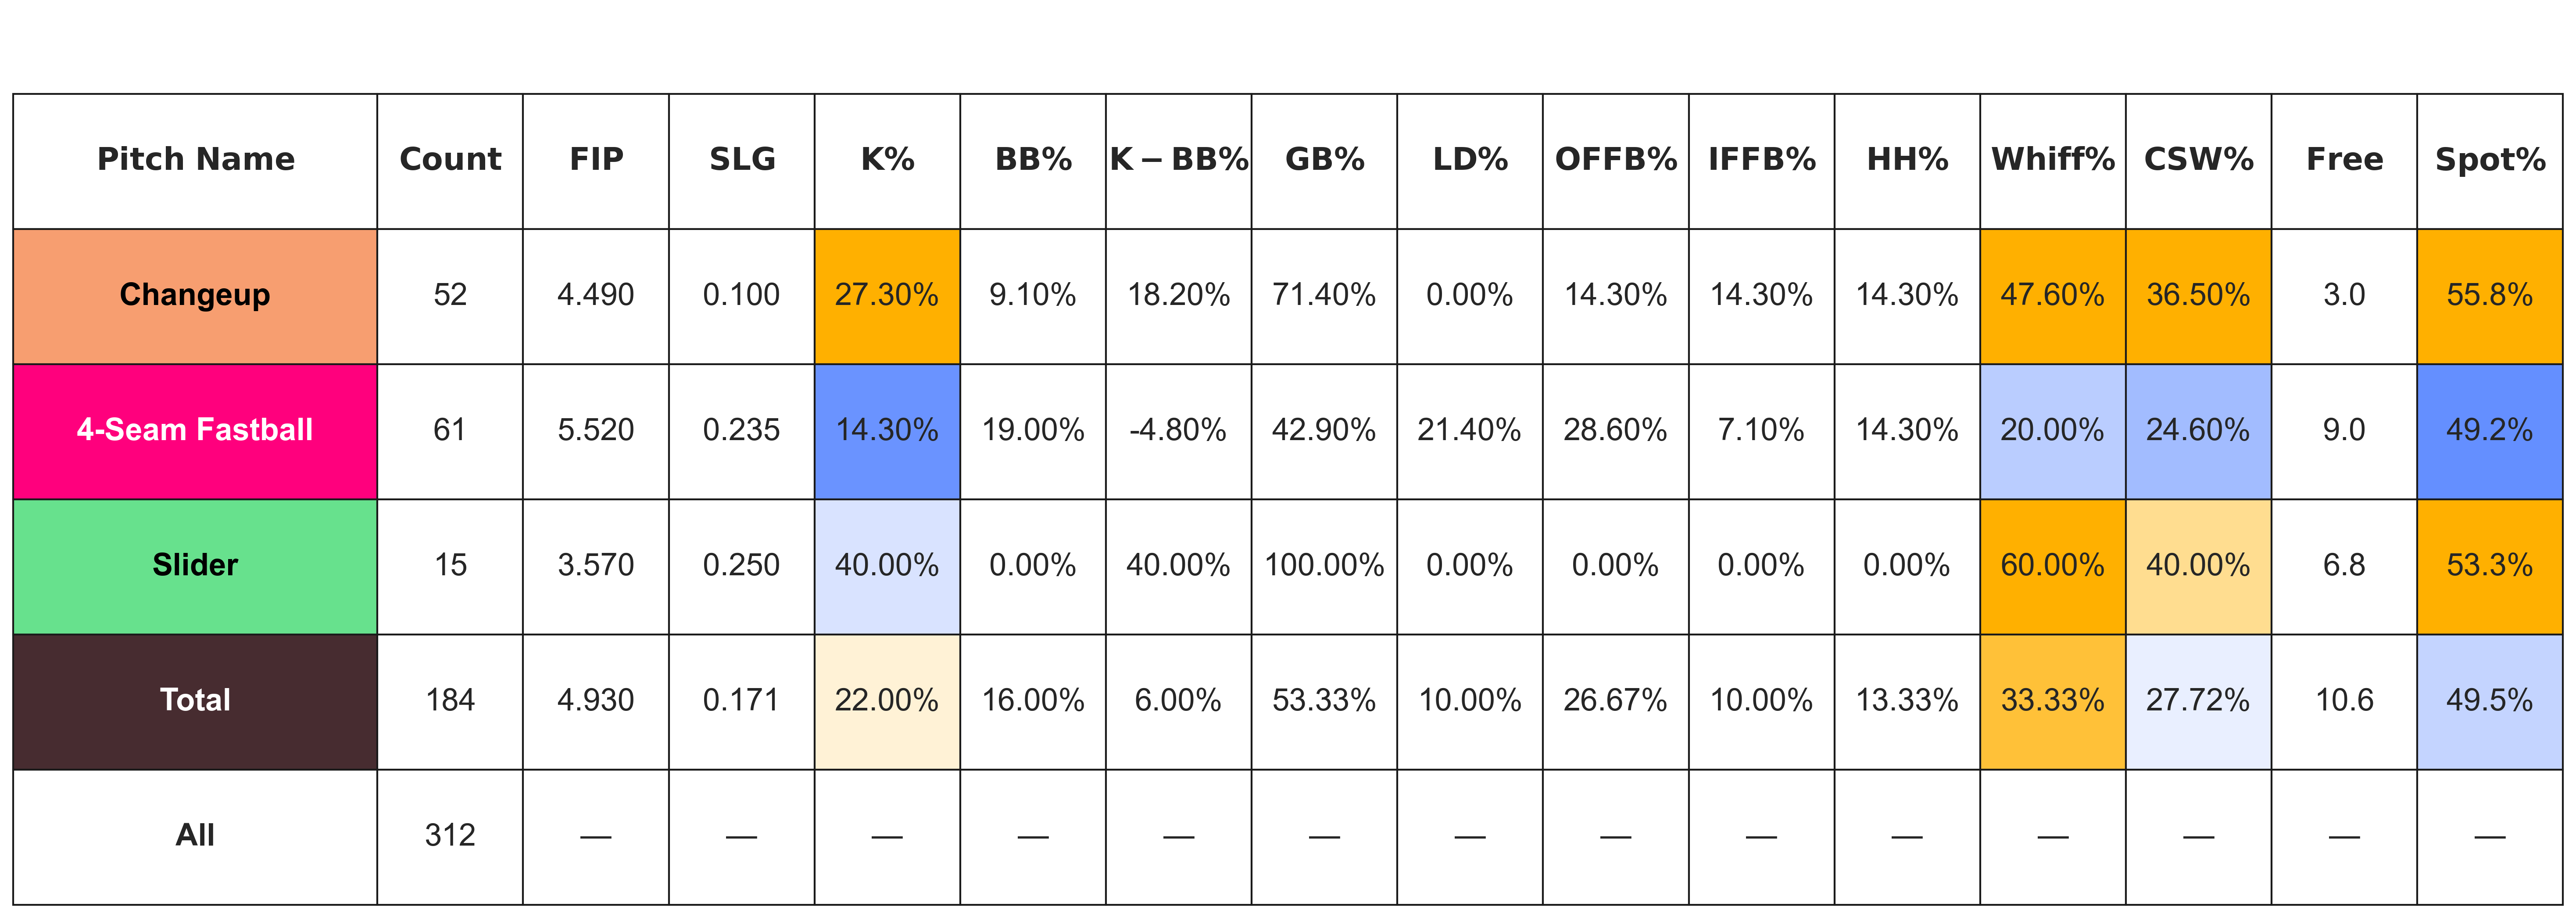

In [303]:
def pitch_table2(dfp: pd.DataFrame, ax: plt.Axes,fontsize:int=17):
    dfp_group, colour_list2 = dfp_grouping(dfp)
    colour_list_dfp = get_cell_colouts2(dfp_group, df_pav, colour_stats2, cmap_sum, cmap_sum_r)
    dfp_plot = plot_pitch_format2(dfp_group)

    # Create a table plot with the DataFrame values and specified column labels
    table_plot2 = ax.table(cellText=dfp_plot.values, colLabels=table_columns2, cellLoc='center',
                        bbox=[0, -0.1, 1, 1],
                        colWidths=[2.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        cellColours=colour_list_dfp)

    # Disable automatic font size adjustment and set the font size
    table_plot2.auto_set_font_size(False)

    table_plot2.set_fontsize(fontsize)

    # Scale the table plot
    table_plot2.scale(1, 0.5)

    # Correctly format the new column names using LaTeX formatting
    new_column_names2 = ['$\\bf{Pitch\\ Name}$'] + [pitch_stats_dict2[x]['table_header'] if x in pitch_stats_dict2 else '---' for x in table_columns2[1:]]

    # Update the table headers with the new column names
    for i, col_name in enumerate(new_column_names2):
        table_plot2.get_celld()[(0, i)].get_text().set_text(col_name)

    # Bold the first column in the table
    for i in range(len(dfp_plot)):
        table_plot2.get_celld()[(i+1, 0)].get_text().set_fontweight('bold')

    # Set the color for the first column, all rows except header and last
    for i in range(1, len(dfp_plot)):
        # Check if the pitch type is in the specified list
        if table_plot2.get_celld()[(i, 0)].get_text().get_text() in ['Split-Finger', 'Slider', 'Changeup']:
            table_plot2.get_celld()[(i, 0)].set_text_props(color='#000000', fontweight='bold')
        else:
            table_plot2.get_celld()[(i, 0)].set_text_props(color='#FFFFFF')
        # Set the background color of the cell
        table_plot2.get_celld()[(i, 0)].set_facecolor(colour_list2[i-1])

    # Remove the axis
    ax.axis('off')

pitch_table2(dfp = dfp, ax = plt.subplots(figsize=(25, 8))[1])

C:\Users\chame\AppData\Local\Temp\ipykernel_37772\3028361073.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_group_select[tb2] = pd.to_numeric(dfp_group_select[tb2].str.replace('%', ''), errors='coerce')
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\3028361073.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_dfp[tb2] = pd.to_numeric(select_dfp[tb2].str.replace('%', ''), errors='coerce')
C:\Users\chame\AppData\Local\Temp\ipykernel_37772\2810891452.py:17: SettingWithCopyWarning: 
A val

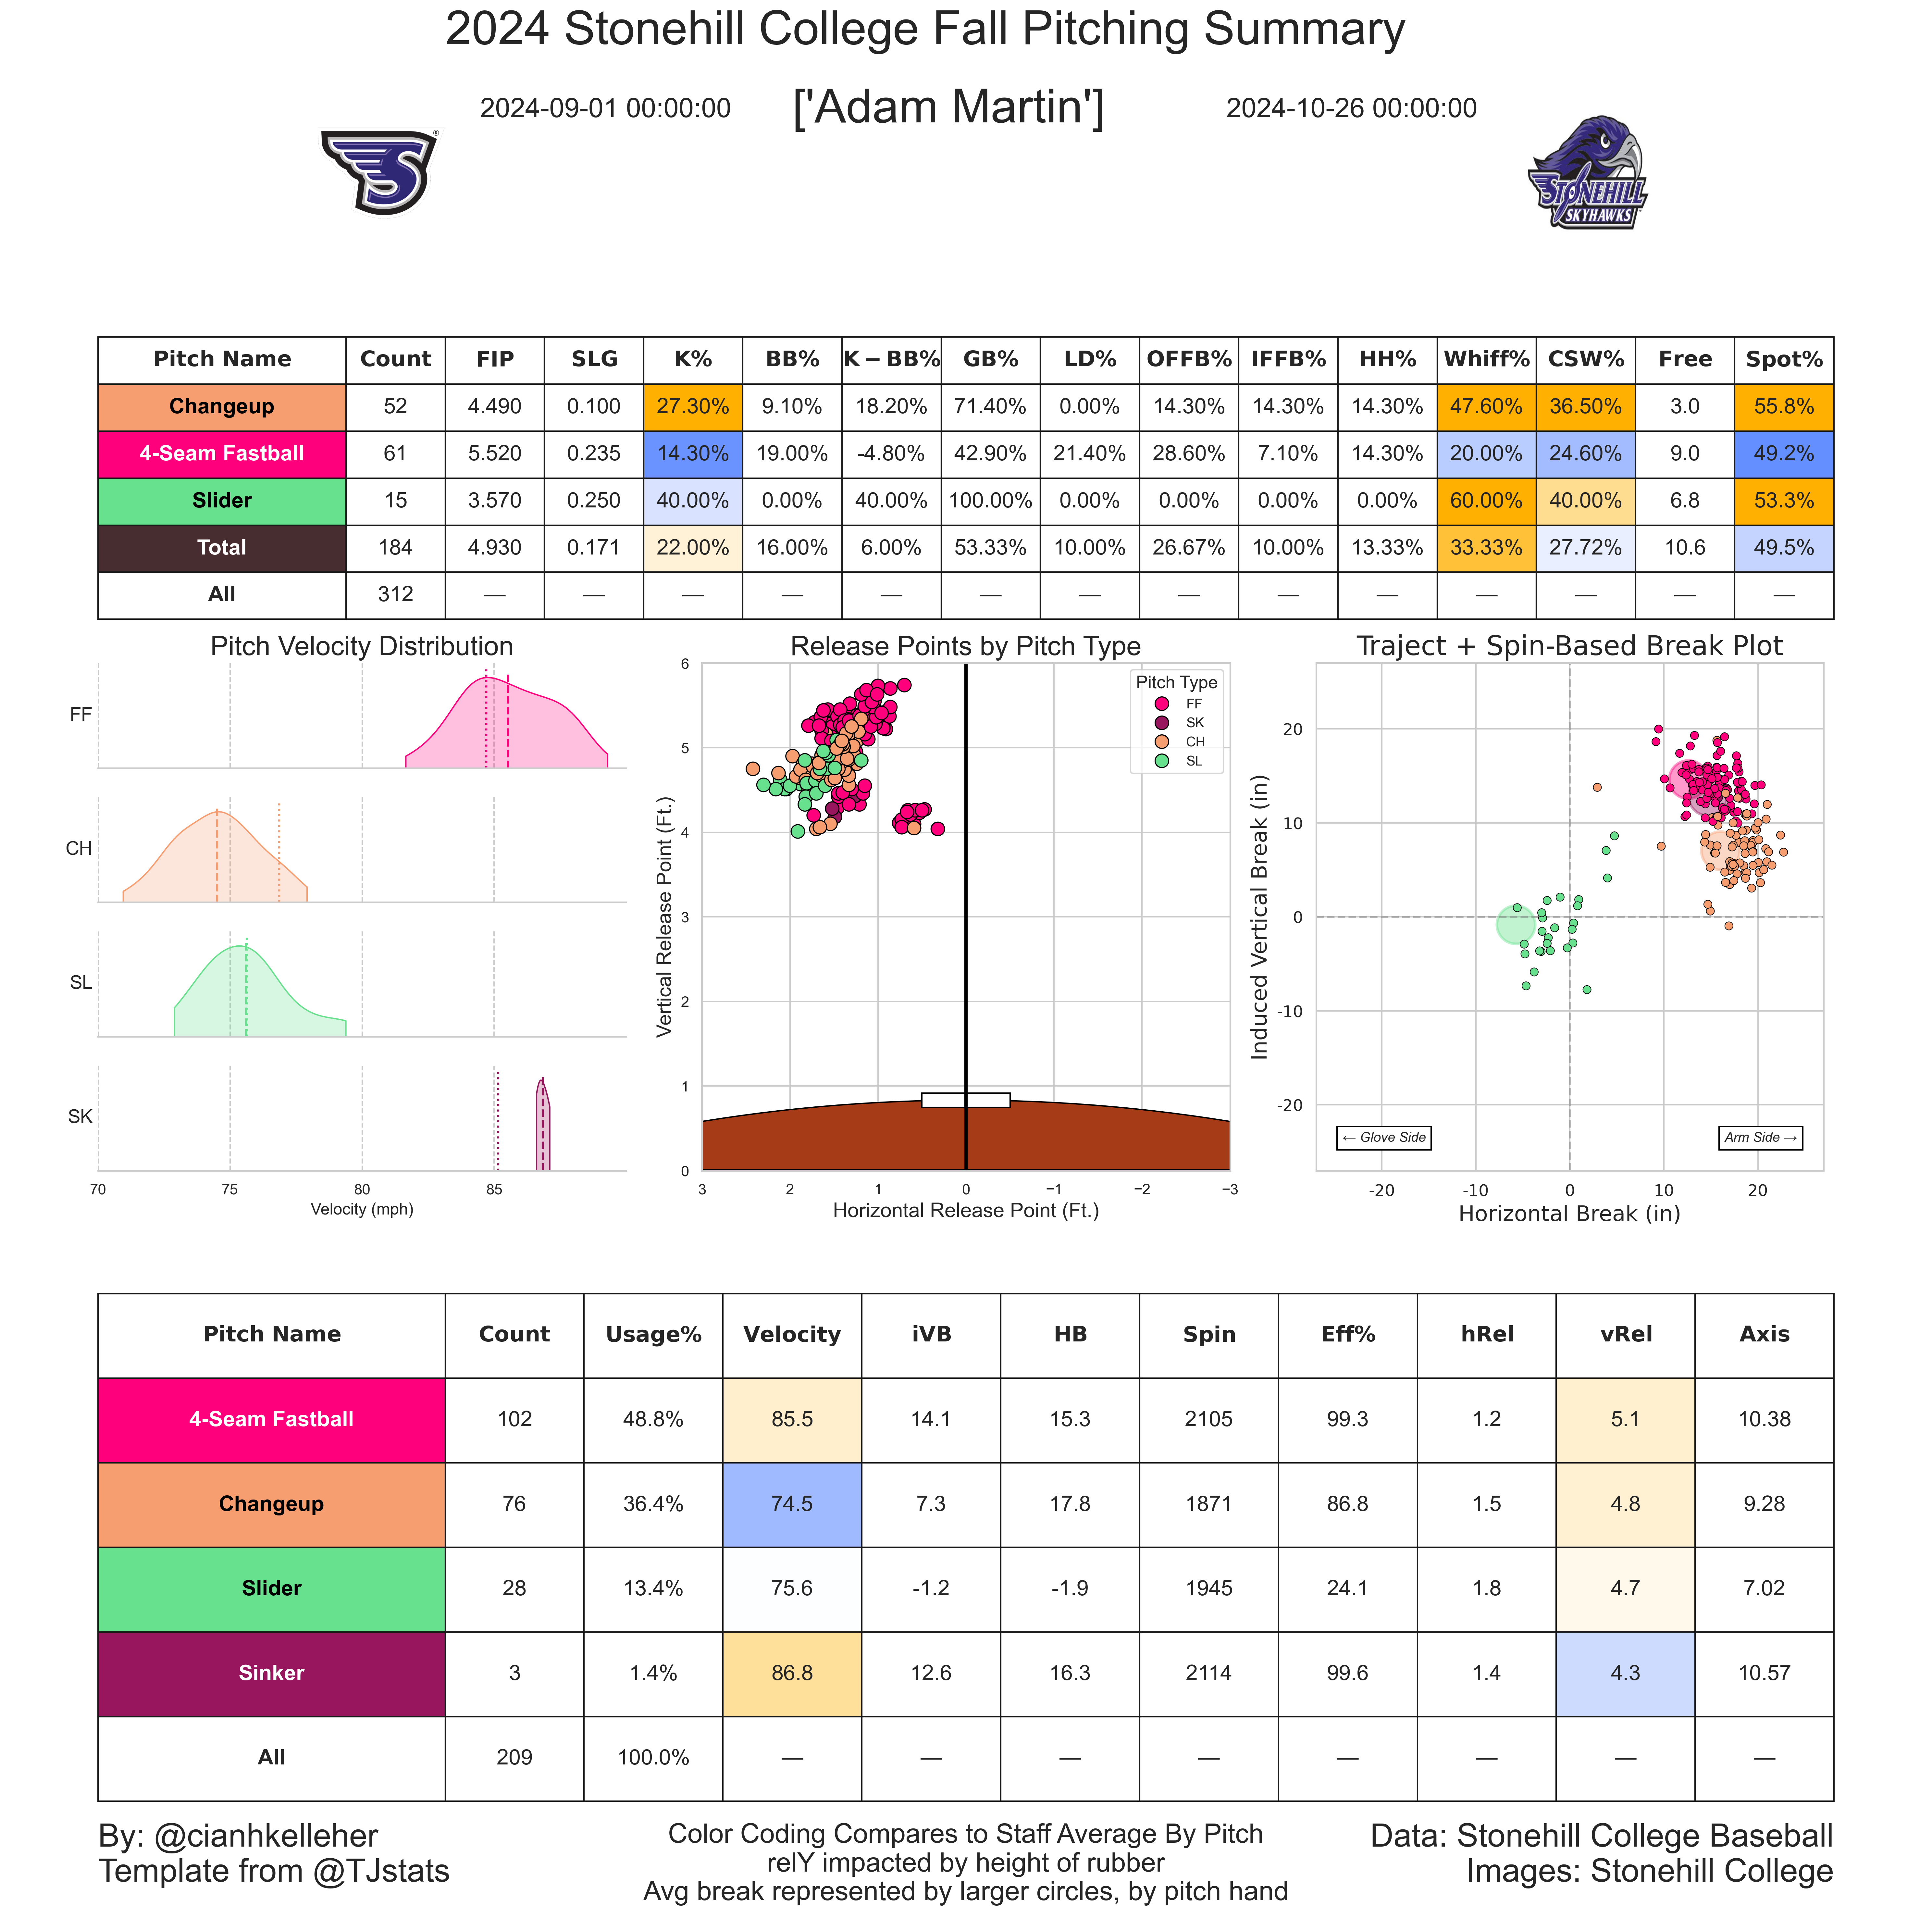

In [304]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def pitching_dashboard(player_id: str, df: pd.DataFrame):
    # Create a 20 by 20 figure
    df = df
    fig = plt.figure(figsize=(20, 20))

    # Create a gridspec layout with 8 columns and 6 rows
    # Include border plots for the header, footer, left, and right
    gs = gridspec.GridSpec(6, 8,
                        height_ratios=[2,9,20,36,36,7],
                        width_ratios=[1,18,18,18,18,18,18,1])

    ax_logo = fig.add_subplot(gs[1,1:3])

    ax_logo2 = fig.add_subplot(gs[1,5:7])

    ax_table_2 = fig.add_subplot(gs[2,1:7])

    ax_plot_1 = fig.add_subplot(gs[3,1:3])

    ax_plot_2 = fig.add_subplot(gs[3,3:5])

    ax_plot_3 = fig.add_subplot(gs[3,5:7])

    ax_table = fig.add_subplot(gs[4,1:7])


    ax_footer = fig.add_subplot(gs[-1,1:7])
    ax_middle = fig.add_subplot(gs[2,3:5])
    ax_semi = fig.add_subplot(gs[1,1:7])
    ax_header = fig.add_subplot(gs[0,1:7])
    ax_left = fig.add_subplot(gs[:,0])
    ax_right = fig.add_subplot(gs[:,-1])

    # Hide axes for footer, header, left, and right
    ax_footer.axis('off')
    ax_header.axis('off')
    ax_semi.axis('off')
    ax_middle.axis('off')
    ax_left.axis('off')
    ax_right.axis('off')

# Call the functions
    fontsize = 16
    plot_logo(ax=ax_logo)
    plot_logo2(ax=ax_logo2)
    pitch_table(df, ax_table, fontsize=fontsize)
    pitch_table2(dfp, ax_table_2, fontsize=fontsize)
    velocity_kdes(df=df, ax=ax_plot_1, gs=gs, gs_x=[3,4], gs_y=[1,3], fig=fig)
    plot_release_points(df=df, ax=ax_plot_2)
    break_plot2(df=df, df_all=df_all, ax=ax_plot_3)
    #break_plot(df=df, df_all=df_all, ax=ax_plot_3)

    ax_header.text(0.2, 1, '2024 Stonehill College Fall Pitching Summary', va='top', fontsize=35)
    ax_semi.text(0.4, 1, pname, va='center', fontsize=35)
    ax_semi.text(0.22, 1, start_date, va='center', fontsize=20)
    ax_semi.text(0.65, 1, end_date, va='center', fontsize=20)
    # Add footer text
    ax_footer.text(0, 1, 'By: @cianhkelleher\nTemplate from @TJstats', ha='left', va='top', fontsize=24)
    ax_footer.text(0.5, 1, 'Color Coding Compares to Staff Average By Pitch\nrelY impacted by height of rubber\nAvg break represented by larger circles, by pitch hand', ha='center', va='top', fontsize=20)
    ax_footer.text(1, 1, 'Data: Stonehill College Baseball\nImages: Stonehill College', ha='right', va='top', fontsize=24)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()



# Call the pitching_dashboard function with the pitcher ID and the list of statistics
pitching_dashboard(player_id, df)
